#  This notebook will be mainly used for the capstone project.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import folium
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

import itertools
from itertools import chain

from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

%matplotlib inline

#print(plt.style.available)

def my_mpl(): # define the format for my plots.
    plt.style.use('default')
    SMALL_SIZE = 12
    MEDIUM_SIZE = 18
    BIGGER_SIZE = 24
    plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    print("my matplotlib style has been reset.")

my_mpl()
    
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

import time

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

my matplotlib style has been reset.


In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = 50

In [3]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


# 1. Dealing with the data

In [4]:
!wget https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
df = pd.read_csv("Data-Collisions.csv")
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


SEVERITYCODE           X          Y  OBJECTID  INCKEY  COLDETKEY REPORTNO  \
0             2 -122.323148  47.703140         1    1307       1307  3502005   
1             1 -122.347294  47.647172         2   52200      52200  2607959   
2             1 -122.334540  47.607871         3   26700      26700  1482393   
3             1 -122.334803  47.604803         4    1144       1144  3503937   
4             2 -122.306426  47.545739         5   17700      17700  1807429   

    STATUS      ADDRTYPE   INTKEY  \
0  Matched  Intersection  37475.0   
1  Matched         Block      NaN   
2  Matched         Block      NaN   
3  Matched         Block      NaN   
4  Matched  Intersection  34387.0   

                                      LOCATION EXCEPTRSNCODE EXCEPTRSNDESC  \
0                   5TH AVE NE AND NE 103RD ST                         NaN   
1   AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N           NaN           NaN   
2  4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST           NaN           NaN   
3     2ND AVE BETWEEN MARION ST AND MADISON ST                         NaN   
4              SWIFT AVE S AND SWIFT AV OFF RP           NaN           NaN   

   SEVERITYCODE.1                    SEVERITYDESC COLLISIONTYPE  PERSONCOUNT  \
0               2                Injury Collision        Angles            2   
1               1  Property Damage Only Collision     Sideswipe            2   
2               1  Property Damage Only Collision    Parked Car            4   
3               1  Property Damage Only Collision         Other            3   
4               2                Injury Collision        Angles            2   

   PEDCOUNT  PEDCYLCOUNT  VEHCOUNT                 INCDATE  \
0         0            0         2  2013/03/27 00:00:00+00   
1         0            0         2  2006/12/20 00:00:00+00   
2         0            0         3  2004/11/18 00:00:00+00   
3         0            0         3  2013/03/29 00:00:00+00   
4         0            0         2  2004/01/28 00:00:00+00   

                  INCDTTM                             JUNCTIONTYPE  \
0    3/27/2013 2:54:00 PM   At Intersection (intersection related)   
1   12/20/2006 6:55:00 PM  Mid-Block (not related to intersection)   
2  11/18/2004 10:20:00 AM  Mid-Block (not related to intersection)   
3    3/29/2013 9:26:00 AM  Mid-Block (not related to intersection)   
4    1/28/2004 8:04:00 AM   At Intersection (intersection related)   

   SDOT_COLCODE                                       SDOT_COLDESC  \
0            11  MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...   
1            16  MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...   
2            14       MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END   
3            11  MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...   
4            11  MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...   

  INATTENTIONIND UNDERINFL   WEATHER ROADCOND                LIGHTCOND  \
0            NaN         N  Overcast      Wet                 Daylight   
1            NaN         0   Raining      Wet  Dark - Street Lights On   
2            NaN         0  Overcast      Dry                 Daylight   
3            NaN         N     Clear      Dry                 Daylight   
4            NaN         0   Raining      Wet                 Daylight   

  PEDROWNOTGRNT  SDOTCOLNUM SPEEDING ST_COLCODE  \
0           NaN         NaN      NaN         10   
1           NaN   6354039.0      NaN         11   
2           NaN   4323031.0      NaN         32   
3           NaN         NaN      NaN         23   
4           NaN   4028032.0      NaN         10   

                                          ST_COLDESC  SEGLANEKEY  \
0                                  Entering at angle           0   
1  From same direction - both going straight - bo...           0   
2                             One parked--one moving           0   
3                   From same direction - all others           0   
4                                  Enterin

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

In [6]:
df.describe()

SEVERITYCODE              X              Y       OBJECTID  \
count  194673.000000  189339.000000  189339.000000  194673.000000   
mean        1.298901    -122.330518      47.619543  108479.364930   
std         0.457778       0.029976       0.056157   62649.722558   
min         1.000000    -122.419091      47.495573       1.000000   
25%         1.000000    -122.348673      47.575956   54267.000000   
50%         1.000000    -122.330224      47.615369  106912.000000   
75%         2.000000    -122.311937      47.663664  162272.000000   
max         2.000000    -122.238949      47.734142  219547.000000   

              INCKEY      COLDETKEY         INTKEY  SEVERITYCODE.1  \
count  194673.000000  194673.000000   65070.000000   194673.000000   
mean   141091.456350  141298.811381   37558.450576        1.298901   
std     86634.402737   86986.542110   51745.990273        0.457778   
min      1001.000000    1001.000000   23807.000000        1.000000   
25%     70383.000000   70383.000000   28667.000000        1.000000   
50%    123363.000000  123363.000000   29973.000000        1.000000   
75%    203319.000000  203459.000000   33973.000000        2.000000   
max    331454.000000  332954.000000  757580.000000        2.000000   

         PERSONCOUNT       PEDCOUNT    PEDCYLCOUNT       VEHCOUNT  \
count  194673.000000  194673.000000  194673.000000  194673.000000   
mean        2.444427       0.037139       0.028391       1.920780   
std         1.345929       0.198150       0.167413       0.631047   
min         0.000000       0.000000       0.000000       0.000000   
25%         2.000000       0.000000       0.000000       2.000000   
50%         2.000000       0.000000       0.000000       2.000000   
75%         3.000000       0.000000       0.000000       2.000000   
max        81.000000       6.000000       2.000000      12.000000   

        SDOT_COLCODE    SDOTCOLNUM     SEGLANEKEY  CROSSWALKKEY  
count  194673.000000  1.149360e+05  194673.000000  1.946730e+05  
mean       13.867768  7.972521e+06     269.401114  9.782452e+03  
std         6.868755  2.553533e+06    3315.776055  7.226926e+04  
min         0.000000  1.007024e+06       0.000000  0.000000e+00  
25%        11.000000  6.040015e+06       0.000000  0.000000e+00  
50%        13.000000  8.023022e+06       0.000000  0.000000e+00  
75%        14.000000  1.015501e+07       0.000000  0.000000e+00  
max        69.000000  1.307202e+07  525241.000000  5.239700e+06

## checking coloumns one by one.

In [7]:
df["ST_COLDESC"].unique()
df.groupby('ST_COLDESC').count()

SEVERITYCODE      X  \
ST_COLDESC                                                                
All Other Multi Vehicle                                        8      8   
All other non-collision                                      108    101   
Breakage of any part of the vehicle resulting i...            34     32   
Domestic animal other (cat, dog, etc)                         32     31   
Entering at angle                                          34674  34460   
...                                                          ...    ...   
Vehicle going straight hits pedestrian                      2882   2849   
Vehicle hits Pedestrian - All Other Actions                  111    108   
Vehicle overturned                                           815    786   
Vehicle turning left hits pedestrian                        2178   2173   
Vehicle turning right hits pedestrian                       1201   1195   

                                                        Y  OBJECTID  INCKEY  \
ST_COLDESC                                                                    
All Other Multi Vehicle                                 8         8       8   
All other non-collision                               101       108     108   
Breakage of any part of the vehicle resulting i...     32        34      34   
Domestic animal other (cat, dog, etc)                  31        32      32   
Entering at angle                                   34460     34674   34674   
...                                                   ...       ...     ...   
Vehicle going straight hits pedestrian               2849      2882    2882   
Vehicle hits Pedestrian - All Other Actions           108       111     111   
Vehicle overturned                                    786       815     815   
Vehicle turning left hits pedestrian                 2173      2178    2178   
Vehicle turning right hits pedestrian                1195      1201    1201   

                                                    COLDETKEY  REPORTNO  \
ST_COLDESC                                                                
All Other Multi Vehicle                                     8         8   
All other non-collision                                   108       108   
Breakage of any part of the vehicle resulting i...         34        34   
Domestic animal other (cat, dog, etc)                      32        32   
Entering at angle                                       34674     34674   
...                                                       ...       ...   
Vehicle going straight hits pedestrian                   2882      2882   
Vehicle hits Pedestrian - All Other Actions               111       111   
Vehicle overturned                                        815       815   
Vehicle turning left hits pedestrian                     2178      2178   
Vehicle turning right hits pedestrian                    1201      1201   

                                                    STATUS  ADDRTYPE  INTKEY  \
ST_COLDESC                                                                     
All Other Multi Vehicle                                  8         8       2   
All other non-collision                                108       107      23   
Breakage of any part of the vehicle resulting i...      34        34       2   
Domestic animal other (cat, dog, etc)                   32        32      13   
Entering at angle                                    34674     34608   28885   
...                                                    ...       ...     ...   
Vehicle going straight hits pedestrian                2882      2880    1510   
Vehicle hits Pedestrian - All Other Actions            111       110      36   
Vehicle overturned                                     815       811     281   
Vehicle turning left hits pedestrian                  2178      2178    2034   
Vehicle turning right hits pedestrian                 1201      1200    1060   

                               

In [8]:
df["SDOT_COLCODE"].unique()

array([11, 16, 14, 51, 13, 26, 28, 18, 34,  0, 24, 69, 12, 21, 23, 29, 27,
       48, 15, 55, 33, 56, 54, 31, 44, 32, 25, 66, 36, 64, 22, 58, 47, 61,
       35, 53, 46, 68, 52], dtype=int64)

In [10]:
df[df['SDOT_COLCODE'].isnull()]

Empty DataFrame
Columns: [SEVERITYCODE, X, Y, OBJECTID, INCKEY, COLDETKEY, REPORTNO, STATUS, ADDRTYPE, INTKEY, LOCATION, EXCEPTRSNCODE, EXCEPTRSNDESC, SEVERITYCODE.1, SEVERITYDESC, COLLISIONTYPE, PERSONCOUNT, PEDCOUNT, PEDCYLCOUNT, VEHCOUNT, INCDATE, INCDTTM, JUNCTIONTYPE, SDOT_COLCODE, SDOT_COLDESC, INATTENTIONIND, UNDERINFL, WEATHER, ROADCOND, LIGHTCOND, PEDROWNOTGRNT, SDOTCOLNUM, SPEEDING, ST_COLCODE, ST_COLDESC, SEGLANEKEY, CROSSWALKKEY, HITPARKEDCAR]
Index: []

In [9]:
df.groupby('SDOT_COLCODE').count()

SEVERITYCODE      X      Y  OBJECTID  INCKEY  COLDETKEY  \
SDOT_COLCODE                                                            
0                     9787   7401   7401      9787    9787       9787   
11                   85209  84538  84538     85209   85209      85209   
12                    1440   1422   1422      1440    1440       1440   
13                    5852   5780   5780      5852    5852       5852   
14                   54299  53213  53213     54299   54299      54299   
15                    1604   1597   1597      1604    1604       1604   
16                    9928   9780   9780      9928    9928       9928   
18                    3104   3091   3091      3104    3104       3104   
21                     181    181    181       181     181        181   
22                      17     16     16        17      17         17   
23                     124    122    122       124     124        124   
24                    6518   6485   6485      6518    6518       6518   
25                     102    102    102       102     102        102   
26                    4741   4102   4102      4741    4741       4741   
27                     166    165    165       166     166        166   
28                    8856   8631   8631      8856    8856       8856   
29                     479    463    463       479     479        479   
31                     104    102    102       104     104        104   
32                      12     12     12        12      12         12   
33                      53     53     53        53      53         53   
34                      93     91     91        93      93         93   
35                       6      6      6         6       6          6   
36                       4      4      4         4       4          4   
44                       8      8      8         8       8          8   
46                       3      3      3         3       3          3   
47                       1      1      1         1       1          1   
48                     107    106    106       107     107        107   
51                    1312   1305   1305      1312    1312       1312   
52                       2      2      2         2       2          2   
53                       9      9      9         9       9          9   
54                     139    137    137       139     139        139   
55                      50     50     50        50      50         50   
56                     180    178    178       180     180        180   
58                       5      5      5         5       5          5   
61                       7      7      7         7       7          7   
64                      75     75     75        75      75         75   
66                      23     23     23        23      23         23   
68                       4      4      4         4       4          4   
69                      69     69     69        69      69         69   

              REPORTNO  STATUS  ADDRTYPE  INTKEY  LOCATION  EXCEPTRSNCODE  \
SDOT_COLCODE                                                                
0                 9787    9787      8072    1033      7461           6721   
11               85209   85209     85156   45425     85122          36331   
12                1440    1440      1427      13      1424            445   
13                5852    5852      5805      45      5794           2199   
14               54299   54299     54226    7163     54197          23384   
15                1604    1604      1604     102      1603            365   
16                9928    9928      9921     941      9917           1916   
18                3104    3104      3104    2023      3101           1949   
21                 181     181       181      38       181             82   
22                  17      17        17       1        16              7   
23                 124     124       124      18       124             30   
24                6

In [575]:
df["SEVERITYCODE"].unique()
df.groupby('SEVERITYCODE').count()

X       Y  OBJECTID  INCKEY  COLDETKEY  REPORTNO  STATUS  \
SEVERITYCODE                                                                  
1             132221  132221    136485  136485     136485    136485  136485   
2              57118   57118     58188   58188      58188     58188   58188   

              ADDRTYPE  INTKEY  LOCATION  EXCEPTRSNCODE  EXCEPTRSNDESC  \
SEVERITYCODE                                                             
1               134750   37251    134081          57763           5123   
2                57997   27819     57915          27048            515   

              SEVERITYCODE.1  SEVERITYDESC  COLLISIONTYPE  PERSONCOUNT  \
SEVERITYCODE                                                             
1                     136485        136485         132622       136485   
2                      58188         58188          57147        58188   

              PEDCOUNT  PEDCYLCOUNT  VEHCOUNT  INCDATE  INCDTTM  JUNCTIONTYPE  \
SEVERITYCODE                                                                    
1               136485       136485    136485   136485   136485        130556   
2                58188        58188     58188    58188    58188         57788   

              SDOT_COLCODE  SDOT_COLDESC  INATTENTIONIND  UNDERINFL  WEATHER  \
SEVERITYCODE                                                                   
1                   136485        136485           19408     132630   132488   
2                    58188         58188           10397      57159    57104   

              ROADCOND  LIGHTCOND  PEDROWNOTGRNT  SDOTCOLNUM  SPEEDING  \
SEVERITYCODE                                                             
1               132533     132405            460       81429      5802   
2                57128      57098           4207       33507      3531   

              ST_COLCODE  ST_COLDESC  SEGLANEKEY  CROSSWALKKEY  HITPARKEDCAR  
SEVERITYCODE                                                                  
1                 136480      132622      136485        136485        136485  
2                  58175       57147       58188         58188         58188

In [576]:
df[['ROADCOND']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 1 columns):
ROADCOND    189661 non-null object
dtypes: object(1)
memory usage: 1.5+ MB


In [577]:
df['ROADCOND'].unique()

array(['Wet', 'Dry', nan, 'Unknown', 'Snow/Slush', 'Ice', 'Other',
       'Sand/Mud/Dirt', 'Standing Water', 'Oil'], dtype=object)

In [578]:
df.dtypes

SEVERITYCODE       int64
X                float64
Y                float64
OBJECTID           int64
INCKEY             int64
COLDETKEY          int64
REPORTNO          object
STATUS            object
ADDRTYPE          object
INTKEY           float64
LOCATION          object
EXCEPTRSNCODE     object
                  ...   
UNDERINFL         object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
PEDROWNOTGRNT     object
SDOTCOLNUM       float64
SPEEDING          object
ST_COLCODE        object
ST_COLDESC        object
SEGLANEKEY         int64
CROSSWALKKEY       int64
HITPARKEDCAR      object
Length: 38, dtype: object

In [579]:
df.shape

(194673, 38)

In [580]:
df['LOCATION'].unique()

array(['5TH AVE NE AND NE 103RD ST',
       'AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N',
       '4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST', ...,
       '47TH AVE SW AND SW 98TH ST', 'NE PARK RD AND NE RAVENNA WB BV',
       'PUGET BLVD SW BETWEEN SW HUDSON ST AND DEAD END 1'], dtype=object)

In [581]:
df['LOCATION'].unique().shape

(24103,)

In [582]:
df[df['X'].isnull()]

SEVERITYCODE   X   Y  OBJECTID  INCKEY  COLDETKEY REPORTNO     STATUS  \
10                 1 NaN NaN        14   48900      48900  2024040    Matched   
17                 1 NaN NaN        23   23000      23000   537838    Matched   
29                 1 NaN NaN        38   61500      61500  2607270    Matched   
74                 1 NaN NaN        86    5721       5721  1786583  Unmatched   
120                1 NaN NaN       137    1364       1364  3643907    Matched   
171                1 NaN NaN       193  320833     322333  E937155    Matched   
179                1 NaN NaN       202  111500     111500  3346098    Matched   
261                1 NaN NaN       295   34100      34100  1791153    Matched   
264                2 NaN NaN       298  330894     332394  EA30284    Matched   
...              ...  ..  ..       ...     ...        ...      ...        ...   
194201             1 NaN NaN    218985  309418     310698  E881158    Matched   
194213             1 NaN NaN    219000  307844     309124  3812427    Matched   
194377             1 NaN NaN    219197  307568     308848  3811232    Matched   
194425             1 NaN NaN    219249  309003     310283  E876723    Matched   
194434             1 NaN NaN    219262  310498     311818  3745722    Matched   
194492             1 NaN NaN    219329  308810     310090  3811388    Matched   
194539             2 NaN NaN    219386  307824     309104  E867523    Matched   
194568             1 NaN NaN    219425  309153     310433  E859162    Matched   
194660             2 NaN NaN    219531  308990     310270  3811749    Matched   

            ADDRTYPE   INTKEY  \
10             Alley      NaN   
17             Block      NaN   
29             Block      NaN   
74               NaN      NaN   
120            Block      NaN   
171              NaN      NaN   
179            Block      NaN   
261            Alley      NaN   
264     Intersection  30392.0   
...              ...      ...   
194201         Block      NaN   
194213         Block      NaN   
194377         Block      NaN   
194425         Block      NaN   
194434         Alley      NaN   
194492         Block      NaN   
194539         Block      NaN   
194568           NaN      NaN   
194660         Block      NaN   

                                                 LOCATION EXCEPTRSNCODE  \
10                                                    NaN           NaN   
17      BATTERY ST TUN ON RP BETWEEN BELL ST AND ALASK...           NaN   
29      1ST AVE S BETWEEN 1ST AVS ON N RP AND S ROYAL ...           NaN   
74                                                    NaN           NEI   
120     ALASKAN WY VI SB BETWEEN BATTERY ST TUNNEL SB ...                 
171                                                   NaN           NEI   
179     BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...           NaN   
261                                                   NaN           NaN   
264                       ALASKAN WAY S AND S DEARBORN ST                 
...                                                   ...           ...   
194201  BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...                 
194213  ALASKAN WY VI SB BETWEEN COLUMBIA ST ON RP AND...                 
194377  ALASKAN WY VI NB BETWEEN SENECA ST OFF RP AND ...                 
194425  WEST SEATTLE BR WB BETWEEN 4TH AV S ON RP AND ...                 
194434                                                NaN                 
194492  BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ...                 
194539  ALASKAN WY VI SB BETWEEN ELLIOTT AV ON RP AND ...                 
194568                                                NaN           NEI   
194660  BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...                 

                                            EXCEPTRSNDESC  SEVERITYCODE.1  \
10                                                    NaN               1   
17                                                    NaN              

In [583]:
df.dropna(subset=["X"], axis=0, inplace=True)
df.dropna(subset=["Y"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [584]:
df.shape

(189339, 38)

## Plot the accident Folum  graph.

SEVERITYCODE           X          Y  OBJECTID  INCKEY  COLDETKEY  \
141246             1 -122.317111  47.661295    161636  200421     200561   
126546             1 -122.321891  47.655888    144852  166226     166246   
55624              1 -122.366302  47.638676     63004   76626      76626   
86703              1 -122.356045  47.652599     97826  110608     110608   
179153             1 -122.349741  47.646147    207313  300186     301386   

       REPORTNO   STATUS      ADDRTYPE   INTKEY  \
141246  3733633  Matched         Block      NaN   
126546  3583849  Matched  Intersection  27124.0   
55624   C682073  Matched         Block      NaN   
86703   3374626  Matched         Block      NaN   
179153  E824171  Matched  Intersection  28057.0   

                                                 LOCATION EXCEPTRSNCODE  \
141246  NE 45TH ST BETWEEN ROOSEVELT WAY NE AND 11TH A...                 
126546                  PASADENA PL NE AND NE 40 UPPER ST           NEI   
55624     7TH AVE W BETWEEN W CROCKETT ST AND W MCGRAW ST           NaN   
86703   N 36TH ST BETWEEN PALATINE AVE N AND GREENWOOD...           NaN   
179153                    NICKERSON ST AND WESTLAKE AVE N                 

                                            EXCEPTRSNDESC  SEVERITYCODE.1  \
141246                                                NaN               1   
126546  Not Enough Information, or Insufficient Locati...               1   
55624                                                 NaN               1   
86703                                                 NaN               1   
179153                                                NaN               1   

                          SEVERITYDESC COLLISIONTYPE  PERSONCOUNT  PEDCOUNT  \
141246  Property Damage Only Collision     Sideswipe            3         0   
126546  Property Damage Only Collision    Parked Car            2         0   
55624   Property Damage Only Collision     Sideswipe            2         0   
86703   Property Damage Only Collision     Sideswipe            5         0   
179153  Property Damage Only Collision     Sideswipe            3         0   

        PEDCYLCOUNT  VEHCOUNT                 INCDATE                INCDTTM  \
141246            0         3  2015/08/19 00:00:00+00   8/19/2015 8:23:00 AM   
126546            0         2  2014/04/15 00:00:00+00   4/15/2014 8:15:00 PM   
55624             0         2  2007/02/16 00:00:00+00  2/16/2007 10:00:00 AM   
86703             0         2  2010/07/04 00:00:00+00   7/4/2010 11:53:00 PM   
179153            0         2  2018/07/20 00:00:00+00   7/20/2018 2:34:00 PM   

                                   JUNCTIONTYPE  SDOT_COLCODE  \
141246     Mid-Block (but intersection related)            11   
126546   At Intersection (intersection related)             0   
55624   Mid-Block (not related to intersection)            16   
86703   Mid-Block (not related to intersection)            11   
179153   At Intersection (intersection related)            11   

                                             SDOT_COLDESC INATTENTIONIND  \
141246  MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...            NaN   
126546            NOT ENOUGH INFORMATION / NOT APPLICABLE            NaN   
55624   MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...            NaN   
86703   MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...            NaN   
179153  MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...            NaN   

       UNDERINFL   WEATHER ROADCOND                LIGHTCOND PEDROWNOTGRNT  \
141246         N     Clear      Dry                 Daylight           NaN   
126546         N   Unknown  Unknown                  Unknown           NaN   
55624          0     Clear      Dry                 Daylight           NaN   
86703          N  Overcast      Dry  Dark - Street Lights On           NaN   
179153         N     Clear      Dry                 Daylight           NaN   

        SDOTCOLNUM SPEEDING ST_COLCODE  \
141246         

In [587]:
latitude = 47.608013
longitude = -122.335167
ndots=1000
portion=0.02

df1=df.loc[df['SEVERITYCODE'] == 1]
df1=df1.sample(len(df1))
df2=df.loc[df['SEVERITYCODE'] == 2]
df2=df2.sample(len(df2))

incidents1 = folium.map.FeatureGroup()
# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip( df1.head(    int(portion*len(df1))   ).Y, df1.head(     int(portion*len(df1))      ).X):
    incidents1.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=3, # define how big you want the circle markers to be
            color='green',
            fill=True,
            fill_color='green',
            fill_opacity=0.6,
            legend_name='SEVERITYCODE = 1'
        )
    )

incidents2 = folium.map.FeatureGroup()
# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df2.head(  int(portion*len(df2))    ).Y, df2.head(    int(portion*len(df2))      ).X):
    incidents2.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.6,
            legend_name='SEVERITYCODE = 2'
        )
    )
    
# add incidents to map
S_map = folium.Map(location=[latitude, longitude], zoom_start=12)
#S_map.add_child(incidents2)
S_map.add_child(incidents1)
S_map.save("tmp1.html")
S_map    

In [590]:
# add incidents to map
S_map = folium.Map(location=[latitude, longitude], zoom_start=12)
S_map.add_child(incidents2)
#S_map.add_child(incidents1)
S_map.save("tmp2.html")
S_map

In [591]:
# add incidents to map
S_map = folium.Map(location=[latitude, longitude], zoom_start=12)
S_map.add_child(incidents2)
S_map.add_child(incidents1)
S_map.save("tmp.html")
S_map

## Now drop some columns

In [592]:
df.drop(['OBJECTID', 'INCKEY','COLDETKEY','REPORTNO','STATUS','LOCATION','EXCEPTRSNCODE','EXCEPTRSNDESC','SEVERITYCODE.1','SEVERITYDESC','COLLISIONTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','JUNCTIONTYPE','SDOT_COLCODE','SDOT_COLDESC','SDOTCOLNUM','ST_COLCODE','ST_COLDESC','SEGLANEKEY','CROSSWALKKEY','HITPARKEDCAR'], axis=1, inplace=True)
# let's view the first five elements and see how the dataframe was changed
df.head()

SEVERITYCODE           X          Y      ADDRTYPE   INTKEY  \
0             2 -122.323148  47.703140  Intersection  37475.0   
1             1 -122.347294  47.647172         Block      NaN   
2             1 -122.334540  47.607871         Block      NaN   
3             1 -122.334803  47.604803         Block      NaN   
4             2 -122.306426  47.545739  Intersection  34387.0   

                  INCDATE                 INCDTTM INATTENTIONIND UNDERINFL  \
0  2013/03/27 00:00:00+00    3/27/2013 2:54:00 PM            NaN         N   
1  2006/12/20 00:00:00+00   12/20/2006 6:55:00 PM            NaN         0   
2  2004/11/18 00:00:00+00  11/18/2004 10:20:00 AM            NaN         0   
3  2013/03/29 00:00:00+00    3/29/2013 9:26:00 AM            NaN         N   
4  2004/01/28 00:00:00+00    1/28/2004 8:04:00 AM            NaN         0   

    WEATHER ROADCOND                LIGHTCOND PEDROWNOTGRNT SPEEDING  
0  Overcast      Wet                 Daylight           NaN      NaN  
1   Raining      Wet  Dark - Street Lights On           NaN      NaN  
2  Overcast      Dry                 Daylight           NaN      NaN  
3     Clear      Dry                 Daylight           NaN      NaN  
4   Raining      Wet                 Daylight           NaN      NaN

In [593]:
df['INATTENTIONIND'].unique()

array([nan, 'Y'], dtype=object)

In [594]:
df.groupby('INATTENTIONIND').count()

SEVERITYCODE      X      Y  ADDRTYPE  INTKEY  INCDATE  \
INATTENTIONIND                                                          
Y                      29176  29176  29176     29176    7436    29176   

                INCDTTM  UNDERINFL  WEATHER  ROADCOND  LIGHTCOND  \
INATTENTIONIND                                                     
Y                 29176      29176    29148     29165      29127   

                PEDROWNOTGRNT  SPEEDING  
INATTENTIONIND                           
Y                         430       666

In [595]:
df[['INATTENTIONIND']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189339 entries, 0 to 189338
Data columns (total 1 columns):
INATTENTIONIND    29176 non-null object
dtypes: object(1)
memory usage: 1.4+ MB


In [596]:
df['INATTENTIONIND'].value_counts()

Y    29176
Name: INATTENTIONIND, dtype: int64

In [597]:
df["INATTENTIONIND"].replace(np.nan, 0, inplace=True)

In [598]:
df["INATTENTIONIND"].replace("Y", 1, inplace=True)

In [599]:
df['SPEEDING'].unique()

array([nan, 'Y'], dtype=object)

In [600]:
df.drop(['INTKEY'], axis=1, inplace=True)
# let's view the first five elements and see how the dataframe was changed
df.head()

SEVERITYCODE           X          Y      ADDRTYPE                 INCDATE  \
0             2 -122.323148  47.703140  Intersection  2013/03/27 00:00:00+00   
1             1 -122.347294  47.647172         Block  2006/12/20 00:00:00+00   
2             1 -122.334540  47.607871         Block  2004/11/18 00:00:00+00   
3             1 -122.334803  47.604803         Block  2013/03/29 00:00:00+00   
4             2 -122.306426  47.545739  Intersection  2004/01/28 00:00:00+00   

                  INCDTTM  INATTENTIONIND UNDERINFL   WEATHER ROADCOND  \
0    3/27/2013 2:54:00 PM               0         N  Overcast      Wet   
1   12/20/2006 6:55:00 PM               0         0   Raining      Wet   
2  11/18/2004 10:20:00 AM               0         0  Overcast      Dry   
3    3/29/2013 9:26:00 AM               0         N     Clear      Dry   
4    1/28/2004 8:04:00 AM               0         0   Raining      Wet   

                 LIGHTCOND PEDROWNOTGRNT SPEEDING  
0                 Daylight           NaN      NaN  
1  Dark - Street Lights On           NaN      NaN  
2                 Daylight           NaN      NaN  
3                 Daylight           NaN      NaN  
4                 Daylight           NaN      NaN

In [601]:
df[['PEDROWNOTGRNT']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189339 entries, 0 to 189338
Data columns (total 1 columns):
PEDROWNOTGRNT    4645 non-null object
dtypes: object(1)
memory usage: 1.4+ MB


In [602]:
df["PEDROWNOTGRNT"].replace(np.nan, 0, inplace=True)

In [603]:
df["SPEEDING"].replace(np.nan, 0, inplace=True)

In [604]:
df.head()

SEVERITYCODE           X          Y      ADDRTYPE                 INCDATE  \
0             2 -122.323148  47.703140  Intersection  2013/03/27 00:00:00+00   
1             1 -122.347294  47.647172         Block  2006/12/20 00:00:00+00   
2             1 -122.334540  47.607871         Block  2004/11/18 00:00:00+00   
3             1 -122.334803  47.604803         Block  2013/03/29 00:00:00+00   
4             2 -122.306426  47.545739  Intersection  2004/01/28 00:00:00+00   

                  INCDTTM  INATTENTIONIND UNDERINFL   WEATHER ROADCOND  \
0    3/27/2013 2:54:00 PM               0         N  Overcast      Wet   
1   12/20/2006 6:55:00 PM               0         0   Raining      Wet   
2  11/18/2004 10:20:00 AM               0         0  Overcast      Dry   
3    3/29/2013 9:26:00 AM               0         N     Clear      Dry   
4    1/28/2004 8:04:00 AM               0         0   Raining      Wet   

                 LIGHTCOND PEDROWNOTGRNT SPEEDING  
0                 Daylight             0        0  
1  Dark - Street Lights On             0        0  
2                 Daylight             0        0  
3                 Daylight             0        0  
4                 Daylight             0        0

In [605]:
df["UNDERINFL"].unique()

array(['N', '0', nan, '1', 'Y'], dtype=object)

In [606]:
df["UNDERINFL"].replace('N', 0, inplace=True)
df["UNDERINFL"].replace(np.nan, 0, inplace=True)
df["UNDERINFL"].replace('Y', 0, inplace=True)

In [607]:
df.head()

SEVERITYCODE           X          Y      ADDRTYPE                 INCDATE  \
0             2 -122.323148  47.703140  Intersection  2013/03/27 00:00:00+00   
1             1 -122.347294  47.647172         Block  2006/12/20 00:00:00+00   
2             1 -122.334540  47.607871         Block  2004/11/18 00:00:00+00   
3             1 -122.334803  47.604803         Block  2013/03/29 00:00:00+00   
4             2 -122.306426  47.545739  Intersection  2004/01/28 00:00:00+00   

                  INCDTTM  INATTENTIONIND UNDERINFL   WEATHER ROADCOND  \
0    3/27/2013 2:54:00 PM               0         0  Overcast      Wet   
1   12/20/2006 6:55:00 PM               0         0   Raining      Wet   
2  11/18/2004 10:20:00 AM               0         0  Overcast      Dry   
3    3/29/2013 9:26:00 AM               0         0     Clear      Dry   
4    1/28/2004 8:04:00 AM               0         0   Raining      Wet   

                 LIGHTCOND PEDROWNOTGRNT SPEEDING  
0                 Daylight             0        0  
1  Dark - Street Lights On             0        0  
2                 Daylight             0        0  
3                 Daylight             0        0  
4                 Daylight             0        0

In [608]:
df["SPEEDING"].unique()

array([0, 'Y'], dtype=object)

In [609]:
df["SPEEDING"].replace('Y', 1, inplace=True)

In [610]:
df["PEDROWNOTGRNT"].unique()

array([0, 'Y'], dtype=object)

In [611]:
df["PEDROWNOTGRNT"].replace('Y', 1, inplace=True)

In [612]:
df["PEDROWNOTGRNT"].astype(int)

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
         ..
189327    0
189328    0
189329    0
189330    0
189331    0
189332    0
189333    0
189334    0
189335    0
189336    0
189337    0
189338    0
Name: PEDROWNOTGRNT, Length: 189339, dtype: int32

In [613]:
df["SPEEDING"].astype(int)

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
         ..
189327    0
189328    0
189329    0
189330    0
189331    0
189332    0
189333    0
189334    0
189335    0
189336    0
189337    0
189338    0
Name: SPEEDING, Length: 189339, dtype: int32

In [614]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189339 entries, 0 to 189338
Data columns (total 13 columns):
SEVERITYCODE      189339 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
ADDRTYPE          189339 non-null object
INCDATE           189339 non-null object
INCDTTM           189339 non-null object
INATTENTIONIND    189339 non-null int64
UNDERINFL         189339 non-null object
WEATHER           184414 non-null object
ROADCOND          184481 non-null object
LIGHTCOND         184327 non-null object
PEDROWNOTGRNT     189339 non-null int64
SPEEDING          189339 non-null int64
dtypes: float64(2), int64(4), object(7)
memory usage: 18.8+ MB


In [615]:
df["UNDERINFL"].unique()

array([0, '0', '1'], dtype=object)

In [616]:
df["UNDERINFL"].astype(int)

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
         ..
189327    0
189328    0
189329    0
189330    0
189331    0
189332    0
189333    0
189334    0
189335    0
189336    0
189337    0
189338    0
Name: UNDERINFL, Length: 189339, dtype: int32

In [617]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189339 entries, 0 to 189338
Data columns (total 13 columns):
SEVERITYCODE      189339 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
ADDRTYPE          189339 non-null object
INCDATE           189339 non-null object
INCDTTM           189339 non-null object
INATTENTIONIND    189339 non-null int64
UNDERINFL         189339 non-null object
WEATHER           184414 non-null object
ROADCOND          184481 non-null object
LIGHTCOND         184327 non-null object
PEDROWNOTGRNT     189339 non-null int64
SPEEDING          189339 non-null int64
dtypes: float64(2), int64(4), object(7)
memory usage: 18.8+ MB


In [618]:
df["UNDERINFL"].unique()

array([0, '0', '1'], dtype=object)

In [619]:
df["UNDERINFL"].replace('0', 0, inplace=True)
df["UNDERINFL"].replace('1', 1, inplace=True)

In [620]:
df["UNDERINFL"].unique()

array([0, 1], dtype=int64)

In [621]:
df.head()

SEVERITYCODE           X          Y      ADDRTYPE                 INCDATE  \
0             2 -122.323148  47.703140  Intersection  2013/03/27 00:00:00+00   
1             1 -122.347294  47.647172         Block  2006/12/20 00:00:00+00   
2             1 -122.334540  47.607871         Block  2004/11/18 00:00:00+00   
3             1 -122.334803  47.604803         Block  2013/03/29 00:00:00+00   
4             2 -122.306426  47.545739  Intersection  2004/01/28 00:00:00+00   

                  INCDTTM  INATTENTIONIND  UNDERINFL   WEATHER ROADCOND  \
0    3/27/2013 2:54:00 PM               0          0  Overcast      Wet   
1   12/20/2006 6:55:00 PM               0          0   Raining      Wet   
2  11/18/2004 10:20:00 AM               0          0  Overcast      Dry   
3    3/29/2013 9:26:00 AM               0          0     Clear      Dry   
4    1/28/2004 8:04:00 AM               0          0   Raining      Wet   

                 LIGHTCOND  PEDROWNOTGRNT  SPEEDING  
0                 Daylight              0         0  
1  Dark - Street Lights On              0         0  
2                 Daylight              0         0  
3                 Daylight              0         0  
4                 Daylight              0         0

In [622]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189339 entries, 0 to 189338
Data columns (total 13 columns):
SEVERITYCODE      189339 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
ADDRTYPE          189339 non-null object
INCDATE           189339 non-null object
INCDTTM           189339 non-null object
INATTENTIONIND    189339 non-null int64
UNDERINFL         189339 non-null int64
WEATHER           184414 non-null object
ROADCOND          184481 non-null object
LIGHTCOND         184327 non-null object
PEDROWNOTGRNT     189339 non-null int64
SPEEDING          189339 non-null int64
dtypes: float64(2), int64(5), object(6)
memory usage: 18.8+ MB


In [623]:
df["WEATHER"].unique()

array(['Overcast', 'Raining', 'Clear', nan, 'Unknown', 'Other', 'Snowing',
       'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt',
       'Severe Crosswind', 'Partly Cloudy'], dtype=object)

In [624]:
df["ROADCOND"].unique()

array(['Wet', 'Dry', nan, 'Unknown', 'Snow/Slush', 'Ice', 'Other',
       'Sand/Mud/Dirt', 'Standing Water', 'Oil'], dtype=object)

In [625]:
df["LIGHTCOND"].unique()

array(['Daylight', 'Dark - Street Lights On', 'Dark - No Street Lights',
       nan, 'Unknown', 'Dusk', 'Dawn', 'Dark - Street Lights Off',
       'Other', 'Dark - Unknown Lighting'], dtype=object)

In [626]:
dftest=df[~df['LIGHTCOND'].isin(['Unknown',np.nan])]

In [627]:
dftest['LIGHTCOND'].unique()

array(['Daylight', 'Dark - Street Lights On', 'Dark - No Street Lights',
       'Dusk', 'Dawn', 'Dark - Street Lights Off', 'Other',
       'Dark - Unknown Lighting'], dtype=object)

In [628]:
df=dftest

In [629]:
df.shape

(171895, 13)

In [630]:
df=df[~df['ROADCOND'].isin(['Unknown',np.nan])]

In [631]:
df=df[~df['WEATHER'].isin(['Unknown',np.nan])]

In [632]:
df.shape

(166705, 13)

In [633]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166705 entries, 0 to 189338
Data columns (total 13 columns):
SEVERITYCODE      166705 non-null int64
X                 166705 non-null float64
Y                 166705 non-null float64
ADDRTYPE          166705 non-null object
INCDATE           166705 non-null object
INCDTTM           166705 non-null object
INATTENTIONIND    166705 non-null int64
UNDERINFL         166705 non-null int64
WEATHER           166705 non-null object
ROADCOND          166705 non-null object
LIGHTCOND         166705 non-null object
PEDROWNOTGRNT     166705 non-null int64
SPEEDING          166705 non-null int64
dtypes: float64(2), int64(5), object(6)
memory usage: 17.8+ MB


In [634]:
df.reset_index(drop=True, inplace=True)

In [635]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166705 entries, 0 to 166704
Data columns (total 13 columns):
SEVERITYCODE      166705 non-null int64
X                 166705 non-null float64
Y                 166705 non-null float64
ADDRTYPE          166705 non-null object
INCDATE           166705 non-null object
INCDTTM           166705 non-null object
INATTENTIONIND    166705 non-null int64
UNDERINFL         166705 non-null int64
WEATHER           166705 non-null object
ROADCOND          166705 non-null object
LIGHTCOND         166705 non-null object
PEDROWNOTGRNT     166705 non-null int64
SPEEDING          166705 non-null int64
dtypes: float64(2), int64(5), object(6)
memory usage: 16.5+ MB


In [636]:
df.head()

SEVERITYCODE           X          Y      ADDRTYPE                 INCDATE  \
0             2 -122.323148  47.703140  Intersection  2013/03/27 00:00:00+00   
1             1 -122.347294  47.647172         Block  2006/12/20 00:00:00+00   
2             1 -122.334540  47.607871         Block  2004/11/18 00:00:00+00   
3             1 -122.334803  47.604803         Block  2013/03/29 00:00:00+00   
4             2 -122.306426  47.545739  Intersection  2004/01/28 00:00:00+00   

                  INCDTTM  INATTENTIONIND  UNDERINFL   WEATHER ROADCOND  \
0    3/27/2013 2:54:00 PM               0          0  Overcast      Wet   
1   12/20/2006 6:55:00 PM               0          0   Raining      Wet   
2  11/18/2004 10:20:00 AM               0          0  Overcast      Dry   
3    3/29/2013 9:26:00 AM               0          0     Clear      Dry   
4    1/28/2004 8:04:00 AM               0          0   Raining      Wet   

                 LIGHTCOND  PEDROWNOTGRNT  SPEEDING  
0                 Daylight              0         0  
1  Dark - Street Lights On              0         0  
2                 Daylight              0         0  
3                 Daylight              0         0  
4                 Daylight              0         0

In [637]:
df.drop(['PEDROWNOTGRNT'], axis=1, inplace=True)
# let's view the first five elements and see how the dataframe was changed
df.head()

SEVERITYCODE           X          Y      ADDRTYPE                 INCDATE  \
0             2 -122.323148  47.703140  Intersection  2013/03/27 00:00:00+00   
1             1 -122.347294  47.647172         Block  2006/12/20 00:00:00+00   
2             1 -122.334540  47.607871         Block  2004/11/18 00:00:00+00   
3             1 -122.334803  47.604803         Block  2013/03/29 00:00:00+00   
4             2 -122.306426  47.545739  Intersection  2004/01/28 00:00:00+00   

                  INCDTTM  INATTENTIONIND  UNDERINFL   WEATHER ROADCOND  \
0    3/27/2013 2:54:00 PM               0          0  Overcast      Wet   
1   12/20/2006 6:55:00 PM               0          0   Raining      Wet   
2  11/18/2004 10:20:00 AM               0          0  Overcast      Dry   
3    3/29/2013 9:26:00 AM               0          0     Clear      Dry   
4    1/28/2004 8:04:00 AM               0          0   Raining      Wet   

                 LIGHTCOND  SPEEDING  
0                 Daylight         0  
1  Dark - Street Lights On         0  
2                 Daylight         0  
3                 Daylight         0  
4                 Daylight         0

In [638]:
df.groupby('SEVERITYCODE').count()


X       Y  ADDRTYPE  INCDATE  INCDTTM  INATTENTIONIND  \
SEVERITYCODE                                                               
1             111844  111844    111844   111844   111844          111844   
2              54861   54861     54861    54861    54861           54861   

              UNDERINFL  WEATHER  ROADCOND  LIGHTCOND  SPEEDING  
SEVERITYCODE                                                     
1                111844   111844    111844     111844    111844  
2                 54861    54861     54861      54861     54861

In [639]:
df.groupby('WEATHER').count()

SEVERITYCODE       X       Y  ADDRTYPE  INCDATE  \
WEATHER                                                                     
Blowing Sand/Dirt                   43      43      43        43       43   
Clear                           106875  106875  106875    106875   106875   
Fog/Smog/Smoke                     539     539     539       539      539   
Other                              242     242     242       242      242   
Overcast                         26429   26429   26429     26429    26429   
Partly Cloudy                        5       5       5         5        5   
Raining                          31619   31619   31619     31619    31619   
Severe Crosswind                    24      24      24        24       24   
Sleet/Hail/Freezing Rain           110     110     110       110      110   
Snowing                            819     819     819       819      819   

                          INCDTTM  INATTENTIONIND  UNDERINFL  ROADCOND  \
WEATHER                                                                  
Blowing Sand/Dirt              43              43         43        43   
Clear                      106875          106875     106875    106875   
Fog/Smog/Smoke                539             539        539       539   
Other                         242             242        242       242   
Overcast                    26429           26429      26429     26429   
Partly Cloudy                   5               5          5         5   
Raining                     31619           31619      31619     31619   
Severe Crosswind               24              24         24        24   
Sleet/Hail/Freezing Rain      110             110        110       110   
Snowing                       819             819        819       819   

                          LIGHTCOND  SPEEDING  
WEATHER                                        
Blowing Sand/Dirt                43        43  
Clear                        106875    106875  
Fog/Smog/Smoke                  539       539  
Other                           242       242  
Overcast                      26429     26429  
Partly Cloudy                     5         5  
Raining                       31619     31619  
Severe Crosswind                 24        24  
Sleet/Hail/Freezing Rain        110       110  
Snowing                         819       819

In [640]:
df.groupby('ROADCOND').count()

SEVERITYCODE       X       Y  ADDRTYPE  INCDATE  INCDTTM  \
ROADCOND                                                                   
Dry                   119406  119406  119406    119406   119406   119406   
Ice                     1071    1071    1071      1071     1071     1071   
Oil                       50      50      50        50       50       50   
Other                     98      98      98        98       98       98   
Sand/Mud/Dirt             57      57      57        57       57       57   
Snow/Slush               833     833     833       833      833      833   
Standing Water            95      95      95        95       95       95   
Wet                    45095   45095   45095     45095    45095    45095   

                INATTENTIONIND  UNDERINFL  WEATHER  LIGHTCOND  SPEEDING  
ROADCOND                                                                 
Dry                     119406     119406   119406     119406    119406  
Ice                       1071       1071     1071       1071      1071  
Oil                         50         50       50         50        50  
Other                       98         98       98         98        98  
Sand/Mud/Dirt               57         57       57         57        57  
Snow/Slush                 833        833      833        833       833  
Standing Water              95         95       95         95        95  
Wet                      45095      45095    45095      45095     45095

In [641]:
df.groupby('LIGHTCOND').count()

SEVERITYCODE       X       Y  ADDRTYPE  INCDATE  \
LIGHTCOND                                                                   
Dark - No Street Lights           1339    1339    1339      1339     1339   
Dark - Street Lights Off          1074    1074    1074      1074     1074   
Dark - Street Lights On          45711   45711   45711     45711    45711   
Dark - Unknown Lighting              9       9       9         9        9   
Dawn                              2347    2347    2347      2347     2347   
Daylight                        110520  110520  110520    110520   110520   
Dusk                              5545    5545    5545      5545     5545   
Other                              160     160     160       160      160   

                          INCDTTM  INATTENTIONIND  UNDERINFL  WEATHER  \
LIGHTCOND                                                               
Dark - No Street Lights      1339            1339       1339     1339   
Dark - Street Lights Off     1074            1074       1074     1074   
Dark - Street Lights On     45711           45711      45711    45711   
Dark - Unknown Lighting         9               9          9        9   
Dawn                         2347            2347       2347     2347   
Daylight                   110520          110520     110520   110520   
Dusk                         5545            5545       5545     5545   
Other                         160             160        160      160   

                          ROADCOND  SPEEDING  
LIGHTCOND                                     
Dark - No Street Lights       1339      1339  
Dark - Street Lights Off      1074      1074  
Dark - Street Lights On      45711     45711  
Dark - Unknown Lighting          9         9  
Dawn                          2347      2347  
Daylight                    110520    110520  
Dusk                          5545      5545  
Other                          160       160

In [642]:
df.groupby('SPEEDING').count()

SEVERITYCODE       X       Y  ADDRTYPE  INCDATE  INCDTTM  \
SPEEDING                                                             
0               158162  158162  158162    158162   158162   158162   
1                 8543    8543    8543      8543     8543     8543   

          INATTENTIONIND  UNDERINFL  WEATHER  ROADCOND  LIGHTCOND  
SPEEDING                                                           
0                 158162     158162   158162    158162     158162  
1                   8543       8543     8543      8543       8543

## Draw several bar plot

my matplotlib style has been reset.


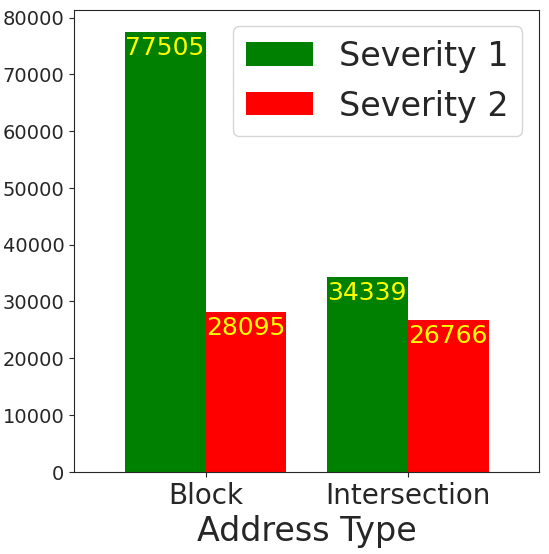

In [643]:
dftmp=pd.DataFrame(      df.groupby(['SEVERITYCODE','ADDRTYPE']).size()       )
dftmp.reset_index(inplace=True)
dftmp.columns = dftmp.columns.astype(str)
dftmp.rename(columns={"0": "Counts"},inplace=True)
dftmp = dftmp.pivot(index='ADDRTYPE', columns='SEVERITYCODE', values='Counts')

sns.set_style('ticks') # change background to white background
ax = dftmp.plot(kind='bar', alpha=1, figsize=(6, 6), fontsize=14, 
               color=['green', 'red'],
               width=0.8, linewidth=0
               )
#ax.set_title('Cost', fontsize=16)
# ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Address Type')
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.axes.yaxis.set_visible(True)
ax.legend(['Severity 1', 'Severity 2'],fontsize=24)
ax.set_xticklabels(dftmp.index, fontsize=20, rotation=0)

a = np.array([-0.2,0.2])

for i, index in enumerate(dftmp.index):
    for j, column in enumerate(dftmp.columns):
        value = dftmp.iloc[i,j]
        b = np.zeros(2)
        b[j]=1
        sft=np.dot(a,b)
        label = str(value)
        ax.annotate(label,xy=(i+sft, value-4000),fontsize=18,ha='center', rotation = 0, color = 'yellow') 
plt.savefig('addrtype.pdf',dpi=200, bbox_inches='tight')
my_mpl()

my matplotlib style has been reset.


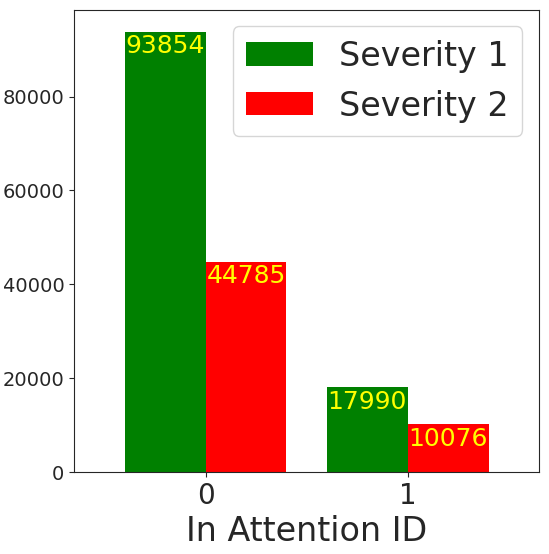

In [644]:
dftmp=pd.DataFrame(      df.groupby(['SEVERITYCODE','INATTENTIONIND']).size()       )
dftmp.reset_index(inplace=True)
dftmp.columns = dftmp.columns.astype(str)
dftmp.rename(columns={"0": "Counts"},inplace=True)
dftmp = dftmp.pivot(index='INATTENTIONIND', columns='SEVERITYCODE', values='Counts')

sns.set_style('ticks') # change background to white background
ax = dftmp.plot(kind='bar', alpha=1, figsize=(6, 6), fontsize=14, 
               color=['green', 'red'],
               width=0.8, linewidth=0
               )
#ax.set_title('Cost', fontsize=16)
# ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('In Attention ID')
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.axes.yaxis.set_visible(True)
ax.legend(['Severity 1', 'Severity 2'],fontsize=24)
ax.set_xticklabels(dftmp.index, fontsize=20, rotation=0)

a = np.array([-0.2,0.2])

for i, index in enumerate(dftmp.index):
    for j, column in enumerate(dftmp.columns):
        value = dftmp.iloc[i,j]
        b = np.zeros(2)
        b[j]=1
        sft=np.dot(a,b)
        label = str(value)
        ax.annotate(label,xy=(i+sft, value-4500),fontsize=18,ha='center', rotation = 0, color = 'yellow') 
plt.savefig('inattenid.pdf',dpi=200, bbox_inches='tight')
my_mpl()

my matplotlib style has been reset.


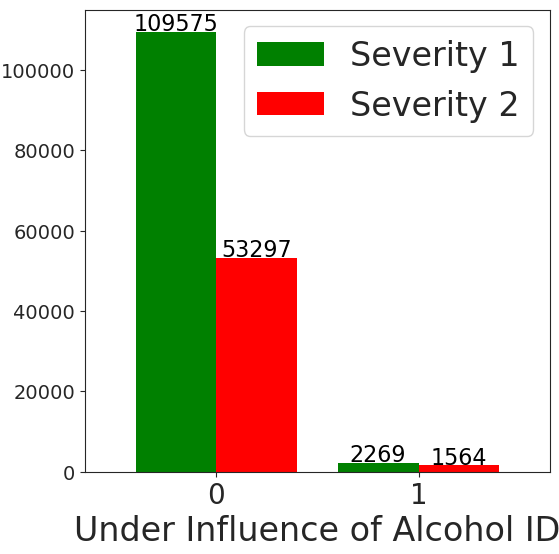

In [645]:
dftmp=pd.DataFrame(      df.groupby(['SEVERITYCODE','UNDERINFL']).size()       )
dftmp.reset_index(inplace=True)
dftmp.columns = dftmp.columns.astype(str)
dftmp.rename(columns={"0": "Counts"},inplace=True)
dftmp = dftmp.pivot(index='UNDERINFL', columns='SEVERITYCODE', values='Counts')

sns.set_style('ticks') # change background to white background
ax = dftmp.plot(kind='bar', alpha=1, figsize=(6, 6), fontsize=14, 
               color=['green', 'red'],
               width=0.8, linewidth=0
               )
#ax.set_title('Cost', fontsize=16)
# ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Under Influence of Alcohol ID')
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.axes.yaxis.set_visible(True)
ax.legend(['Severity 1', 'Severity 2'],fontsize=24)
ax.set_xticklabels(dftmp.index, fontsize=20, rotation=0)

a = np.array([-0.2,0.2])

for i, index in enumerate(dftmp.index):
    for j, column in enumerate(dftmp.columns):
        value = dftmp.iloc[i,j]
        b = np.zeros(2)
        b[j]=1
        sft=np.dot(a,b)
        label = str(value)
        ax.annotate(label,xy=(i+sft, value+200),fontsize=16,ha='center', rotation = 0, color = 'black') 
plt.savefig('Underinflu.pdf',dpi=200, bbox_inches='tight')
my_mpl()

my matplotlib style has been reset.


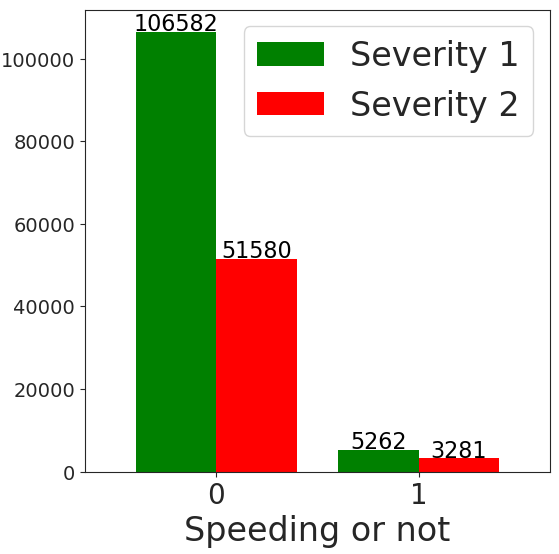

In [646]:
dftmp=pd.DataFrame(      df.groupby(['SEVERITYCODE','SPEEDING']).size()       )
dftmp.reset_index(inplace=True)
dftmp.columns = dftmp.columns.astype(str)
dftmp.rename(columns={"0": "Counts"},inplace=True)
dftmp = dftmp.pivot(index='SPEEDING', columns='SEVERITYCODE', values='Counts')

sns.set_style('ticks') # change background to white background
ax = dftmp.plot(kind='bar', alpha=1, figsize=(6, 6), fontsize=14, 
               color=['green', 'red'],
               width=0.8, linewidth=0
               )
#ax.set_title('Cost', fontsize=16)
# ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Speeding or not')
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.axes.yaxis.set_visible(True)
ax.legend(['Severity 1', 'Severity 2'],fontsize=24)
ax.set_xticklabels(dftmp.index, fontsize=20, rotation=0)

a = np.array([-0.2,0.2])

for i, index in enumerate(dftmp.index):
    for j, column in enumerate(dftmp.columns):
        value = dftmp.iloc[i,j]
        b = np.zeros(2)
        b[j]=1
        sft=np.dot(a,b)
        label = str(value)
        ax.annotate(label,xy=(i+sft, value+200),fontsize=16,ha='center', rotation = 0, color = 'black') 
plt.savefig('speed.pdf',dpi=200, bbox_inches='tight')
my_mpl()

## One hot process

In [647]:
Feature=df
Feature = pd.concat([Feature,pd.get_dummies(df['ADDRTYPE'],prefix='ADDRTYPE')],axis=1)
Feature.drop(['ADDRTYPE'], axis = 1,inplace=True)
Feature.head()
Feature = pd.concat([Feature,pd.get_dummies(df['WEATHER'],prefix='WEATHER')],axis=1)
Feature.drop(['WEATHER'], axis = 1,inplace=True)
Feature.head()
Feature = pd.concat([Feature,pd.get_dummies(df['ROADCOND'],prefix='ROADCOND')],axis=1)
Feature.drop(['ROADCOND'], axis = 1,inplace=True)
Feature.head()
Feature = pd.concat([Feature,pd.get_dummies(df['LIGHTCOND'],prefix='LIGHTCOND')],axis=1)
Feature.drop(['LIGHTCOND'], axis = 1,inplace=True)
Feature.head()

SEVERITYCODE           X          Y                 INCDATE  \
0             2 -122.323148  47.703140  2013/03/27 00:00:00+00   
1             1 -122.347294  47.647172  2006/12/20 00:00:00+00   
2             1 -122.334540  47.607871  2004/11/18 00:00:00+00   
3             1 -122.334803  47.604803  2013/03/29 00:00:00+00   
4             2 -122.306426  47.545739  2004/01/28 00:00:00+00   

                  INCDTTM  INATTENTIONIND  UNDERINFL  SPEEDING  \
0    3/27/2013 2:54:00 PM               0          0         0   
1   12/20/2006 6:55:00 PM               0          0         0   
2  11/18/2004 10:20:00 AM               0          0         0   
3    3/29/2013 9:26:00 AM               0          0         0   
4    1/28/2004 8:04:00 AM               0          0         0   

   ADDRTYPE_Block  ADDRTYPE_Intersection  WEATHER_Blowing Sand/Dirt  \
0               0                      1                          0   
1               1                      0                          0   
2               1                      0                          0   
3               1                      0                          0   
4               0                      1                          0   

   WEATHER_Clear  WEATHER_Fog/Smog/Smoke  WEATHER_Other  WEATHER_Overcast  \
0              0                       0              0                 1   
1              0                       0              0                 0   
2              0                       0              0                 1   
3              1                       0              0                 0   
4              0                       0              0                 0   

   WEATHER_Partly Cloudy  WEATHER_Raining  WEATHER_Severe Crosswind  \
0                      0                0                         0   
1                      0                1                         0   
2                      0                0                         0   
3                      0                0                         0   
4                      0                1                         0   

   WEATHER_Sleet/Hail/Freezing Rain  WEATHER_Snowing  ROADCOND_Dry  \
0                                 0                0             0   
1                                 0                0             0   
2                                 0                0             1   
3                                 0                0             1   
4                                 0                0             0   

   ROADCOND_Ice  ROADCOND_Oil  ROADCOND_Other  ROADCOND_Sand/Mud/Dirt  \
0             0             0               0                       0   
1             0             0               0                       0   
2             0             0               0                       0   
3             0             0               0                       0   
4             0             0               0                       0   

   ROADCOND_Snow/Slush  ROADCOND_Standing Water  ROADCOND_Wet  \
0                    0                        0             1   
1                    0                        0             1   
2                    0                        0             0   
3                    0                        0             0   
4                    0                        0             1   

   LIGHTCOND_Dark - No Street Lights  LIGHTCOND_Dark - Street Lights Off  \
0                                  0                                   0   
1                                  0                                   0   
2                                  0                                   0   
3                                  0                                   0   
4                                  0                                   0   

   LIGHTCOND_Dark - Street Lights On  LIGHTCOND_Dark - Unknown Lighting  \
0                                  0                                  0   
1                                 

In [648]:
df=Feature

In [649]:
df.shape

(166705, 36)

## Some more feature engineering

## minute of the day

In [650]:
df['INCDTTM']=pd.to_datetime(df['INCDTTM'])
df.head()

SEVERITYCODE           X          Y                 INCDATE  \
0             2 -122.323148  47.703140  2013/03/27 00:00:00+00   
1             1 -122.347294  47.647172  2006/12/20 00:00:00+00   
2             1 -122.334540  47.607871  2004/11/18 00:00:00+00   
3             1 -122.334803  47.604803  2013/03/29 00:00:00+00   
4             2 -122.306426  47.545739  2004/01/28 00:00:00+00   

              INCDTTM  INATTENTIONIND  UNDERINFL  SPEEDING  ADDRTYPE_Block  \
0 2013-03-27 14:54:00               0          0         0               0   
1 2006-12-20 18:55:00               0          0         0               1   
2 2004-11-18 10:20:00               0          0         0               1   
3 2013-03-29 09:26:00               0          0         0               1   
4 2004-01-28 08:04:00               0          0         0               0   

   ADDRTYPE_Intersection  WEATHER_Blowing Sand/Dirt  WEATHER_Clear  \
0                      1                          0              0   
1                      0                          0              0   
2                      0                          0              0   
3                      0                          0              1   
4                      1                          0              0   

   WEATHER_Fog/Smog/Smoke  WEATHER_Other  WEATHER_Overcast  \
0                       0              0                 1   
1                       0              0                 0   
2                       0              0                 1   
3                       0              0                 0   
4                       0              0                 0   

   WEATHER_Partly Cloudy  WEATHER_Raining  WEATHER_Severe Crosswind  \
0                      0                0                         0   
1                      0                1                         0   
2                      0                0                         0   
3                      0                0                         0   
4                      0                1                         0   

   WEATHER_Sleet/Hail/Freezing Rain  WEATHER_Snowing  ROADCOND_Dry  \
0                                 0                0             0   
1                                 0                0             0   
2                                 0                0             1   
3                                 0                0             1   
4                                 0                0             0   

   ROADCOND_Ice  ROADCOND_Oil  ROADCOND_Other  ROADCOND_Sand/Mud/Dirt  \
0             0             0               0                       0   
1             0             0               0                       0   
2             0             0               0                       0   
3             0             0               0                       0   
4             0             0               0                       0   

   ROADCOND_Snow/Slush  ROADCOND_Standing Water  ROADCOND_Wet  \
0                    0                        0             1   
1                    0                        0             1   
2                    0                        0             0   
3                    0                        0             0   
4                    0                        0             1   

   LIGHTCOND_Dark - No Street Lights  LIGHTCOND_Dark - Street Lights Off  \
0                                  0                                   0   
1                                  0                                   0   
2                                  0                                   0   
3                                  0                                   0   
4                                  0                                   0   

   LIGHTCOND_Dark - Street Lights On  LIGHTCOND_Dark - Unknown Lighting  \
0                                  0                                  0   
1                                  1                      

In [651]:
df.drop(         df[(df['INCDTTM'].dt.minute == 0 ) & ( df['INCDTTM'].dt.hour == 0  )].index,  inplace=True            )   # drop those records without hour-minute-second in the time stamp, because it is difficult to know what time the accident occured.

In [652]:
df['INCDATE']=pd.to_datetime(df['INCDATE'])
print(df['INCDATE'].max(),df['INCDATE'].min())

2020-04-28 00:00:00+00:00 2004-01-10 00:00:00+00:00


In [653]:
df['INCDATE'].dt.year.describe()

count    144480.000000
mean       2011.744712
std           4.625833
min        2004.000000
25%        2008.000000
50%        2012.000000
75%        2016.000000
max        2020.000000
Name: INCDATE, dtype: float64

## Plot some scatter figs.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


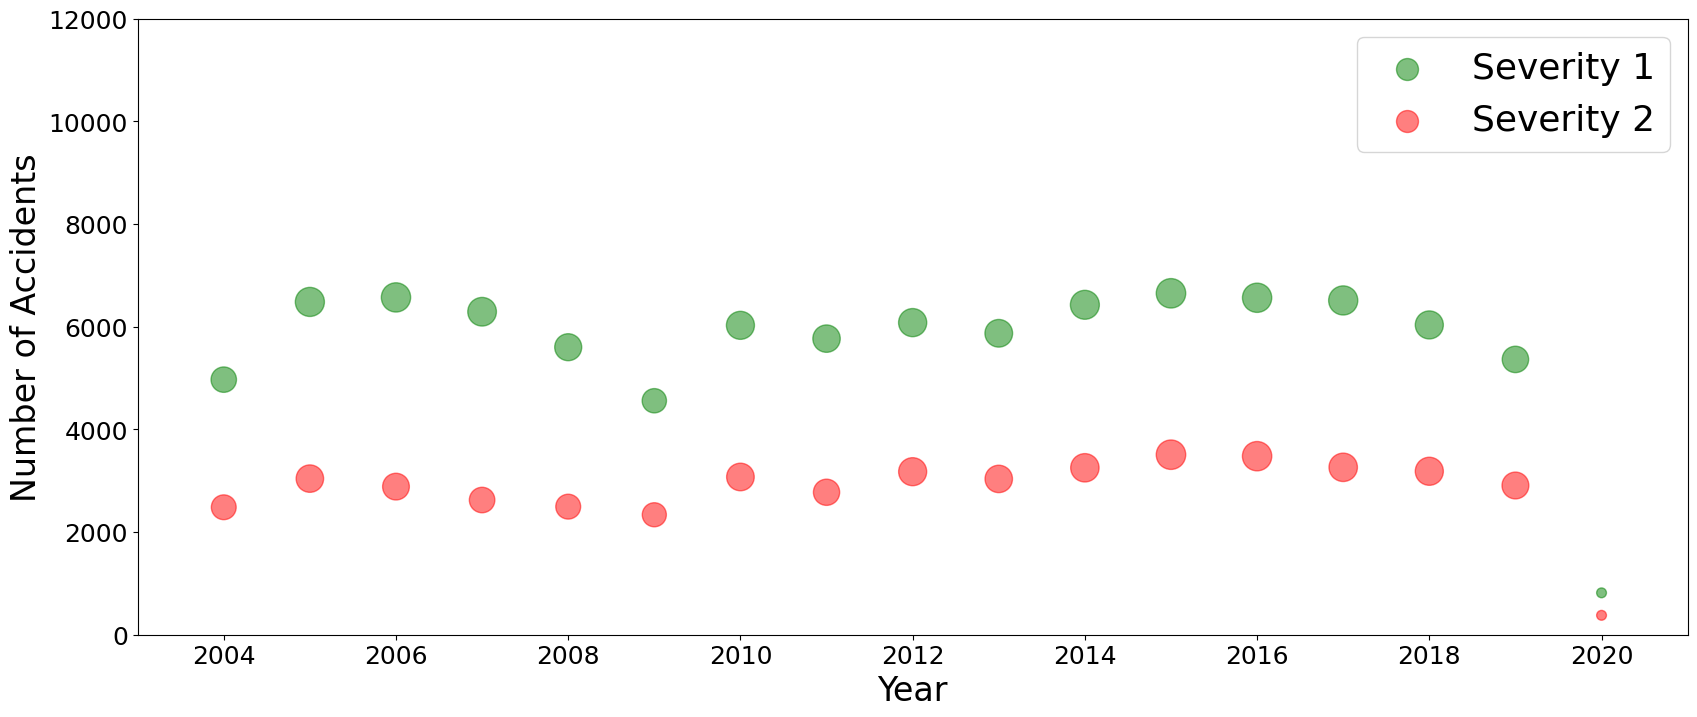

In [654]:
dftmp=df.copy()
dftmp['y']=df['INCDTTM'].dt.year
df_group_one = dftmp[['SEVERITYCODE','y']]

dftmp=pd.DataFrame(  df_group_one.groupby(['SEVERITYCODE','y']).size()  )
dftmp.reset_index(inplace=True)
dftmp.columns = dftmp.columns.astype(str)
dftmp.rename(columns={"0": "Counts"},inplace=True)

dftmp1=dftmp.loc[dftmp['SEVERITYCODE'] == 1]
dftmp2=dftmp.loc[dftmp['SEVERITYCODE'] == 2]

dftmp1['avc']=dftmp1['Counts']
dftmp2['avc']=dftmp2['Counts']

# normalize 1
norm_1 = (dftmp1['Counts'] - dftmp1['Counts'].min()) / ( dftmp1['Counts'].max() - dftmp1['Counts'].min())

# normalize 2
norm_2 = (dftmp2['Counts'] - dftmp2['Counts'].min()) / (dftmp2['Counts'].max() - dftmp2['Counts'].min())


# 1
ax0 = dftmp1.plot(kind='scatter',
                    x='y',
                    y='avc',
                    figsize=(20, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_1 * 400 + 50,  # pass in weights 
                    xlim=(2003,2021),
                    ylim=(0,12000)
                   )

# 2
ax1 = dftmp2.plot(kind='scatter',
                    x='y',
                    y='avc',
                    alpha=0.5,
                    color="red",
                    s=norm_2 * 400 + 50,
                    ax = ax0
                   )

ax0.set_xlabel('Year')
ax0.set_ylabel('Number of Accidents')
#ax0.set_title('Average Number of Accidents per day per hour')
ax0.legend(['Severity 1', 'Severity 2'], loc='upper right', fontsize='x-large')
plt.savefig('yacn.pdf',dpi=200,bbox_inches='tight')
plt.show()

In [656]:
df['dayofyear_cos']=np.cos(df['INCDATE'].dt.dayofyear*2*np.pi/365)
df['dayofyear_sin']=np.sin(df['INCDATE'].dt.dayofyear*2*np.pi/365)
df['minuteofday_cos'] =    np.cos((df['INCDTTM'].dt.hour*60+df['INCDTTM'].dt.minute)*2*np.pi/(60*24))
df['minuteofday_sin'] =    np.sin((df['INCDTTM'].dt.hour*60+df['INCDTTM'].dt.minute)*2*np.pi/(60*24))

SEVERITYCODE           X          Y                   INCDATE  \
0             2 -122.323148  47.703140 2013-03-27 00:00:00+00:00   
1             1 -122.347294  47.647172 2006-12-20 00:00:00+00:00   
2             1 -122.334540  47.607871 2004-11-18 00:00:00+00:00   
3             1 -122.334803  47.604803 2013-03-29 00:00:00+00:00   
4             2 -122.306426  47.545739 2004-01-28 00:00:00+00:00   

              INCDTTM  INATTENTIONIND  UNDERINFL  SPEEDING  ADDRTYPE_Block  \
0 2013-03-27 14:54:00               0          0         0               0   
1 2006-12-20 18:55:00               0          0         0               1   
2 2004-11-18 10:20:00               0          0         0               1   
3 2013-03-29 09:26:00               0          0         0               1   
4 2004-01-28 08:04:00               0          0         0               0   

   ADDRTYPE_Intersection  WEATHER_Blowing Sand/Dirt  WEATHER_Clear  \
0                      1                          0              0   
1                      0                          0              0   
2                      0                          0              0   
3                      0                          0              1   
4                      1                          0              0   

   WEATHER_Fog/Smog/Smoke  WEATHER_Other  WEATHER_Overcast  \
0                       0              0                 1   
1                       0              0                 0   
2                       0              0                 1   
3                       0              0                 0   
4                       0              0                 0   

   WEATHER_Partly Cloudy  WEATHER_Raining  WEATHER_Severe Crosswind  \
0                      0                0                         0   
1                      0                1                         0   
2                      0                0                         0   
3                      0                0                         0   
4                      0                1                         0   

   WEATHER_Sleet/Hail/Freezing Rain  WEATHER_Snowing  ROADCOND_Dry  \
0                                 0                0             0   
1                                 0                0             0   
2                                 0                0             1   
3                                 0                0             1   
4                                 0                0             0   

   ROADCOND_Ice  ROADCOND_Oil  ROADCOND_Other  ROADCOND_Sand/Mud/Dirt  \
0             0             0               0                       0   
1             0             0               0                       0   
2             0             0               0                       0   
3             0             0               0                       0   
4             0             0               0                       0   

   ROADCOND_Snow/Slush  ROADCOND_Standing Water  ROADCOND_Wet  \
0                    0                        0             1   
1                    0                        0             1   
2                    0                        0             0   
3                    0                        0             0   
4                    0                        0             1   

   LIGHTCOND_Dark - No Street Lights  LIGHTCOND_Dark - Street Lights Off  \
0                                  0                                   0   
1                                  0                                   0   
2                                  0                                   0   
3                                  0                                   0   
4                                  0                                   0   

   LIGHTCOND_Dark - Street Lights On  LIGHTCOND_Dark - Unknown Lighting  \
0                                  0                                  0   
1                                  1          

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


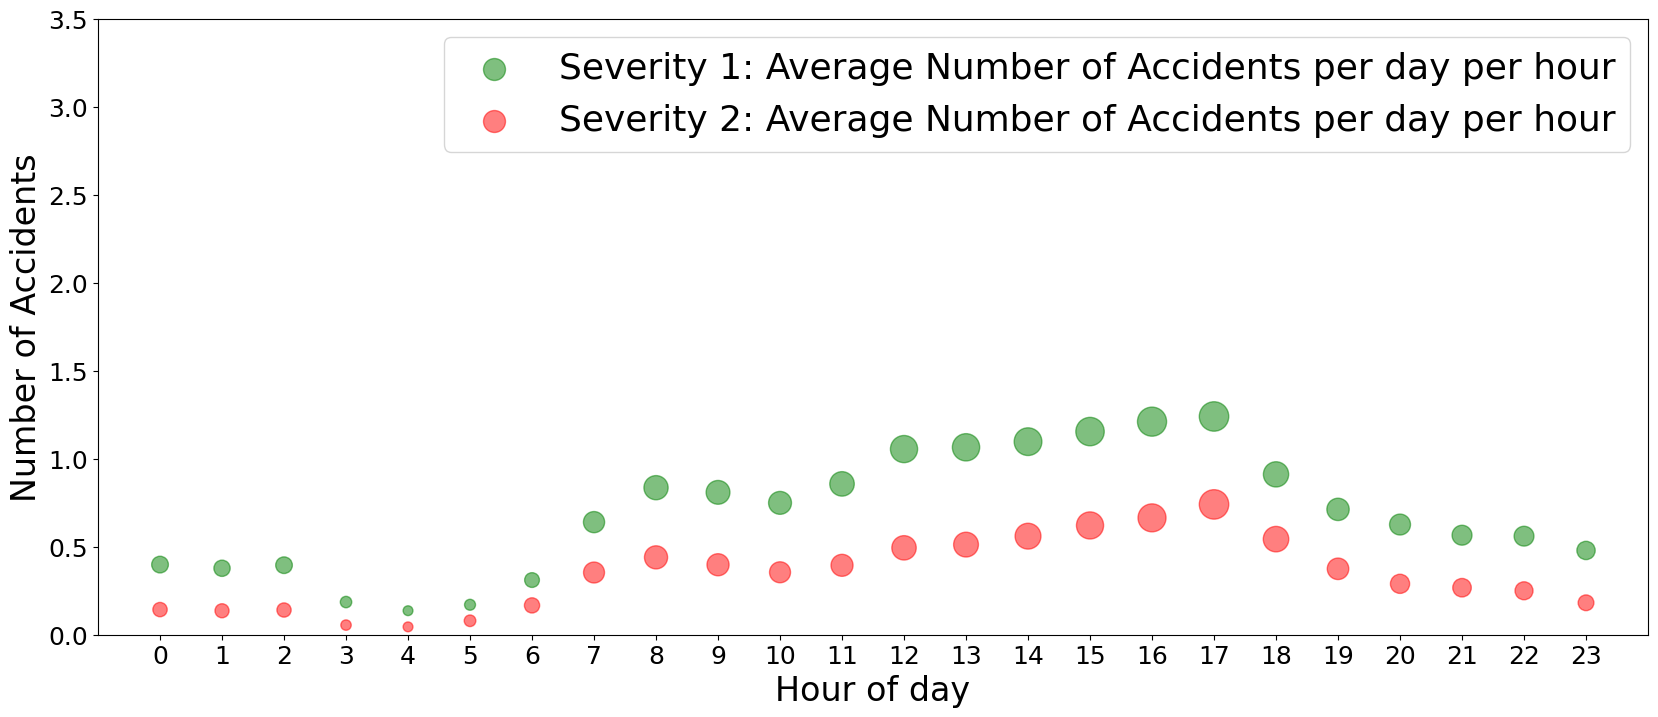

In [658]:
dftmp=df.copy()
dftmp['h']=df['INCDTTM'].dt.hour
df_group_one = dftmp[['SEVERITYCODE','h']]

dftmp=pd.DataFrame(  df_group_one.groupby(['SEVERITYCODE','h']).size()  )
dftmp.reset_index(inplace=True)
dftmp.columns = dftmp.columns.astype(str)
dftmp.rename(columns={"0": "Counts"},inplace=True)

dftmp1=dftmp.loc[dftmp['SEVERITYCODE'] == 1]
dftmp2=dftmp.loc[dftmp['SEVERITYCODE'] == 2]

dftmp1['avc']=dftmp1['Counts']/(16*365)
dftmp2['avc']=dftmp2['Counts']/(16*365)

# normalize 1
norm_1 = (dftmp1['Counts'] - dftmp1['Counts'].min()) / ( dftmp1['Counts'].max() - dftmp1['Counts'].min())

# normalize 2
norm_2 = (dftmp2['Counts'] - dftmp2['Counts'].min()) / (dftmp2['Counts'].max() - dftmp2['Counts'].min())


# 1
ax0 = dftmp1.plot(kind='scatter',
                    x='h',
                    y='avc',
                    figsize=(20, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_1 * 400 + 50,  # pass in weights 
                    xlim=(-1,24),
                    ylim=(0,3.5)
                   )

# 2
ax1 = dftmp2.plot(kind='scatter',
                    x='h',
                    y='avc',
                    alpha=0.5,
                    color="red",
                    s=norm_2 * 400 + 50,
                    ax = ax0
                   )

ax0.set_xlabel('Hour of day')
ax0.set_ylabel('Number of Accidents')
ax0.xaxis.set_ticks(np.arange(0, 24, 1))
#ax0.set_title('Average Number of Accidents per day per hour')
ax0.legend(['Severity 1: Average Number of Accidents per day per hour', 'Severity 2: Average Number of Accidents per day per hour'], loc='upper right', fontsize='x-large')
plt.savefig('shod.pdf',dpi=200,bbox_inches='tight')
plt.show()

In [659]:
df_group_two = df[['SEVERITYCODE','ADDRTYPE_Block','ADDRTYPE_Intersection']]
df_group_two.groupby(['SEVERITYCODE','ADDRTYPE_Block','ADDRTYPE_Intersection']).size()

SEVERITYCODE  ADDRTYPE_Block  ADDRTYPE_Intersection
1             0               1                        29962
              1               0                        66627
2             0               1                        23578
              1               0                        24313
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


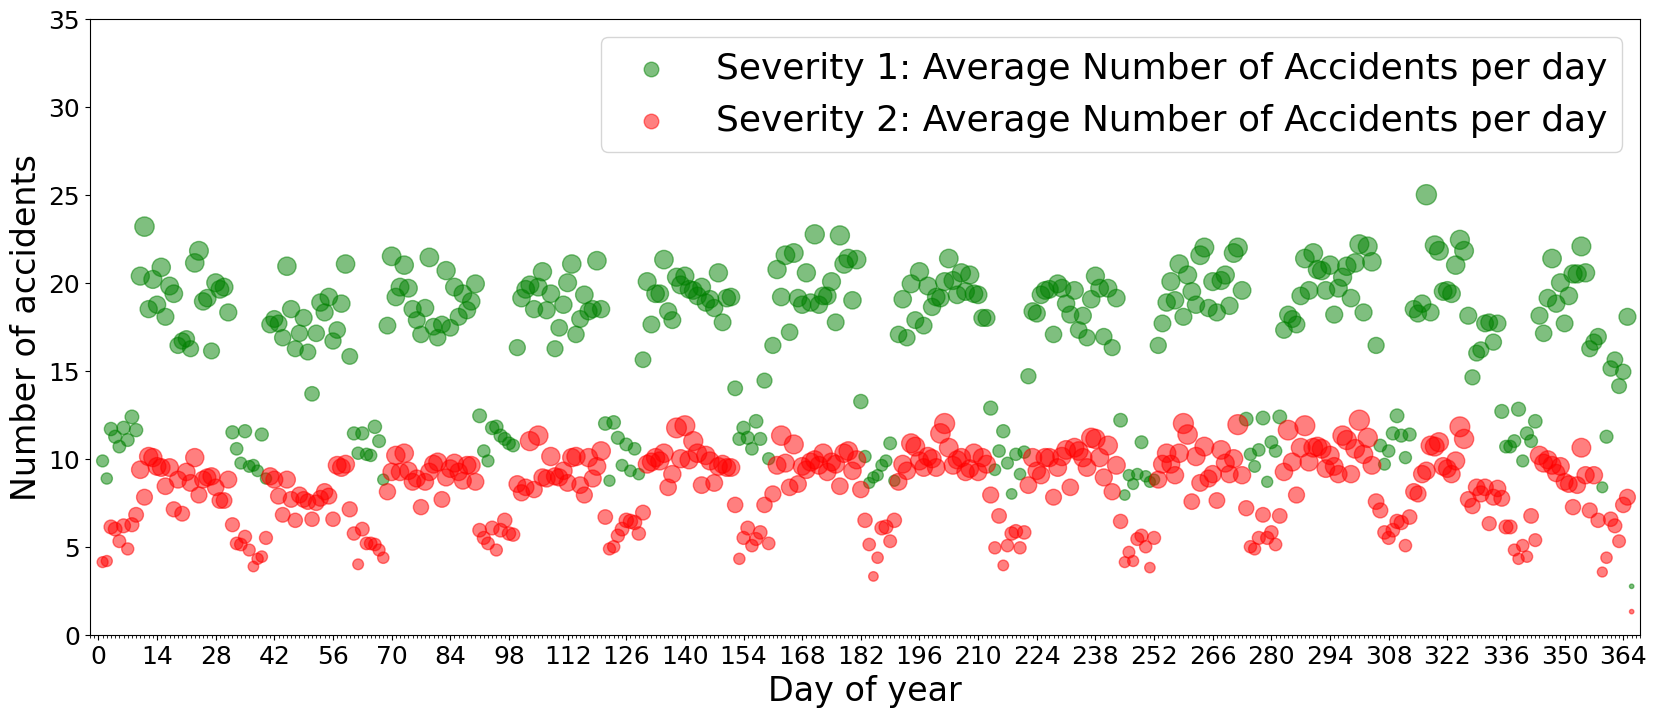

In [660]:
dftmp=df.copy()
dftmp['d']=df['INCDATE'].dt.dayofyear
df_group_three = dftmp[['SEVERITYCODE','d']]
dftmp=df_group_three.groupby(['SEVERITYCODE','d']).size()
pd.set_option('display.max_rows', False)
dftmp=pd.DataFrame(dftmp)
dftmp
dftmp.reset_index(inplace=True)
dftmp.columns = dftmp.columns.astype(str)
dftmp.rename(columns={"0": "Counts"},inplace=True)
dftmp1=dftmp.loc[dftmp['SEVERITYCODE'] == 1]
dftmp2=dftmp.loc[dftmp['SEVERITYCODE'] == 2]

dftmp1['avc']=dftmp1['Counts']/16
dftmp2['avc']=dftmp2['Counts']/16

# normalize 1
norm_1 = (dftmp1['Counts'] - dftmp1['Counts'].min()) / ( dftmp1['Counts'].max() - dftmp1['Counts'].min())

# normalize 2
norm_2 = (dftmp2['Counts'] - dftmp2['Counts'].min()) / (dftmp2['Counts'].max() - dftmp2['Counts'].min())


# 1
ax0 = dftmp1.plot(kind='scatter',
                    x='d',
                    y='avc',
                    figsize=(20, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_1 * 200 + 10,  # pass in weights 
                    xlim=(-2, 368),
                    ylim=(0,35)
                   )

# 2
ax1 = dftmp2.plot(kind='scatter',
                    x='d',
                    y='avc',
                    alpha=0.5,
                    color="red",
                    s=norm_2 * 200 + 10,
                    ax = ax0
                   )
ax0.xaxis.set_ticks(np.arange(0, 375, 14))

ax0.tick_params(axis='x', labelsize=18, rotation=0 )

ax0.xaxis.set_major_locator(MultipleLocator(14))
#ax0.xaxis.set_major_formatter('{x:.0f}')
ax0.xaxis.set_minor_locator(MultipleLocator(1))

ax0.set_xlabel('Day of year')
ax0.set_ylabel('Number of accidents')
#ax0.set_title('Average Number of Accidents per day from 2004 - 2020 in Seattle City')
ax0.legend(['Severity 1: Average Number of Accidents per day', 'Severity 2: Average Number of Accidents per day'], loc='upper right', fontsize='x-large')
plt.savefig('sdoy.pdf',dpi=200,bbox_inches='tight')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


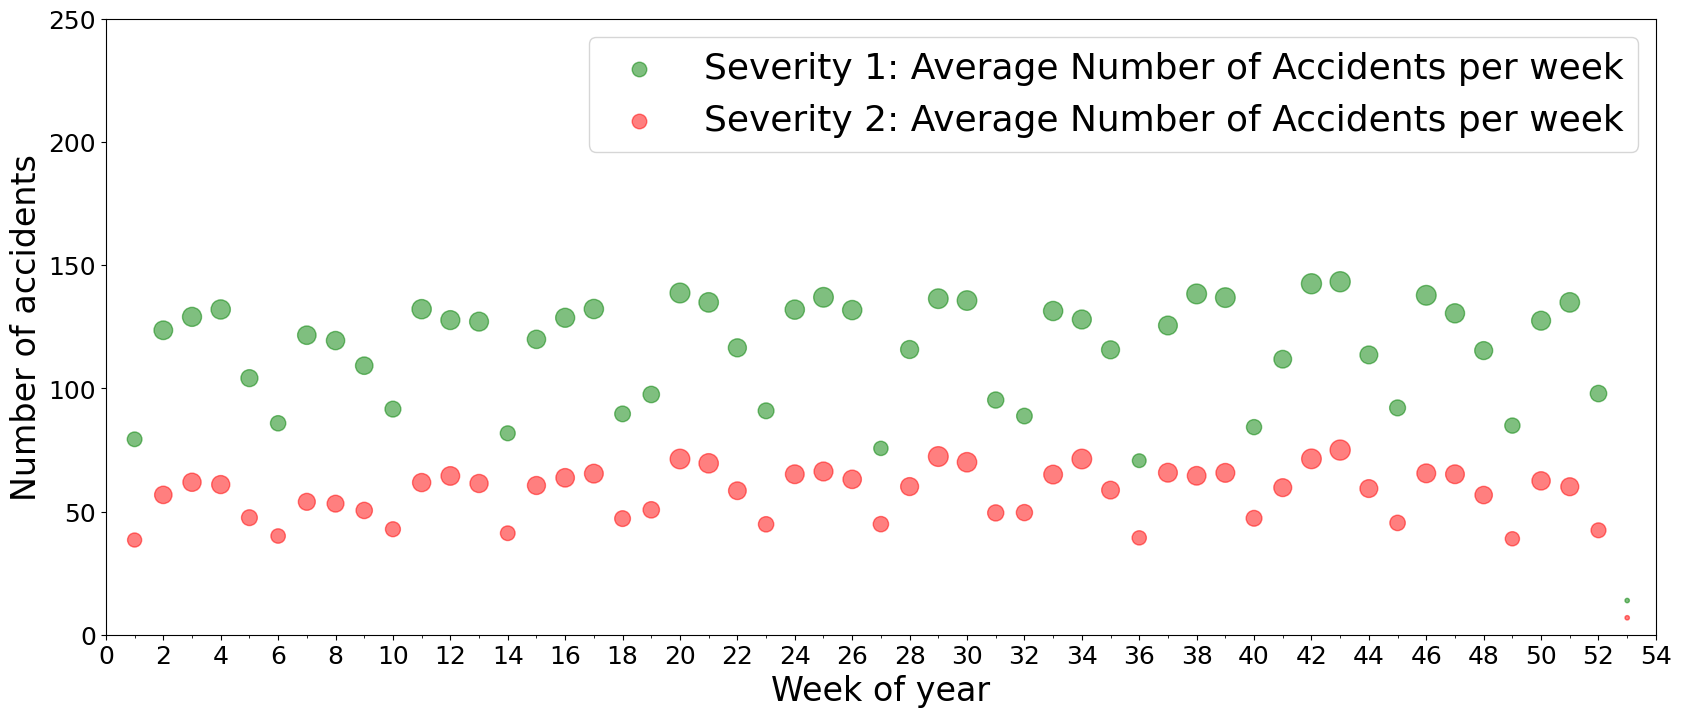

In [661]:
dftmp=df.copy()
dftmp['w']=df['INCDATE'].dt.week
df_group_three = dftmp[['SEVERITYCODE','w']]
dftmp=df_group_three.groupby(['SEVERITYCODE','w']).size()
pd.set_option('display.max_rows', False)
dftmp=pd.DataFrame(dftmp)

dftmp.reset_index(inplace=True)
dftmp.columns = dftmp.columns.astype(str)
dftmp.rename(columns={"0": "Counts"},inplace=True)
dftmp1=dftmp.loc[dftmp['SEVERITYCODE'] == 1]
dftmp2=dftmp.loc[dftmp['SEVERITYCODE'] == 2]

dftmp1['avc']=dftmp1['Counts']/16
dftmp2['avc']=dftmp2['Counts']/16

# normalize 1
norm_1 = (dftmp1['Counts'] - dftmp1['Counts'].min()) / ( dftmp1['Counts'].max() - dftmp1['Counts'].min())

# normalize 2
norm_2 = (dftmp2['Counts'] - dftmp2['Counts'].min()) / (dftmp2['Counts'].max() - dftmp2['Counts'].min())


# 1
ax0 = dftmp1.plot(kind='scatter',
                    x='w',
                    y='avc',
                    figsize=(20, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_1 * 200 + 10,  # pass in weights 
                    xlim=(0, 54),
                    ylim=(0,250)
                   )

# 2
ax1 = dftmp2.plot(kind='scatter',
                    x='w',
                    y='avc',
                    alpha=0.5,
                    color="red",
                    s=norm_2 * 200 + 10,
                    ax = ax0
                   )
ax0.xaxis.set_ticks(np.arange(0, 54, 2))
ax0.xaxis.set_major_locator(MultipleLocator(2))
#ax0.xaxis.set_major_formatter('{x:.0f}')
ax0.xaxis.set_minor_locator(MultipleLocator(1))
ax0.set_xlabel('Week of year')
ax0.set_ylabel('Number of accidents')
#ax0.set_title('Average Number of Accidents per day from 2004 - 2020 in Seattle City')
ax0.legend(['Severity 1: Average Number of Accidents per week', 'Severity 2: Average Number of Accidents per week'], loc='upper right', fontsize='x-large')
plt.savefig('swoy.pdf',dpi=200,bbox_inches='tight')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


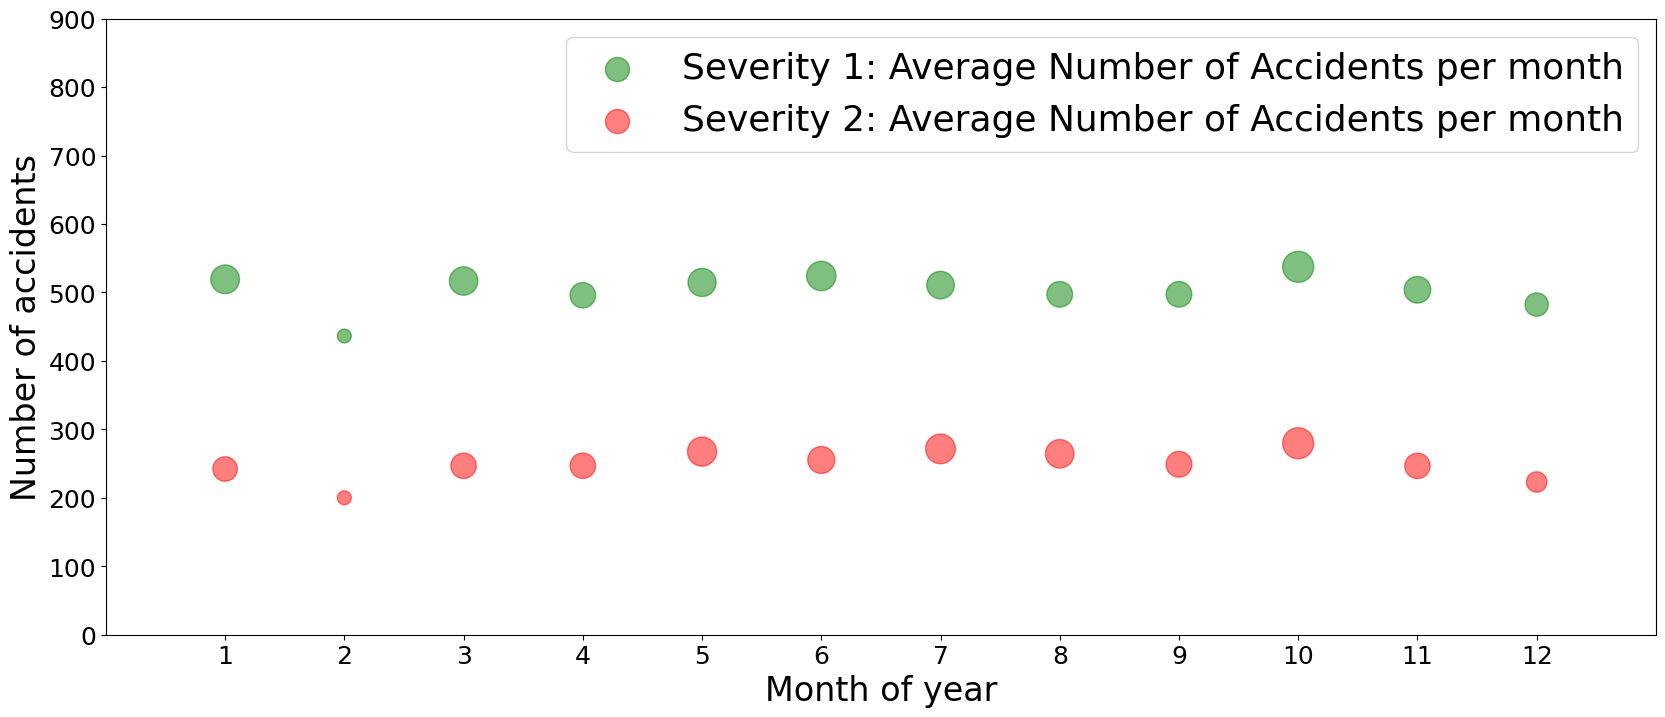

In [662]:
dftmp=df.copy()
dftmp['m']=df['INCDATE'].dt.month
df_group_three = dftmp[['SEVERITYCODE','m']]
dftmp=df_group_three.groupby(['SEVERITYCODE','m']).size()
pd.set_option('display.max_rows', False)
dftmp=pd.DataFrame(dftmp)

dftmp.reset_index(inplace=True)
dftmp.columns = dftmp.columns.astype(str)
dftmp.rename(columns={"0": "Counts"},inplace=True)
dftmp1=dftmp.loc[dftmp['SEVERITYCODE'] == 1]
dftmp2=dftmp.loc[dftmp['SEVERITYCODE'] == 2]

dftmp1['avc']=dftmp1['Counts']/(16)
dftmp2['avc']=dftmp2['Counts']/(16)

# normalize 1
norm_1 = (dftmp1['Counts'] - dftmp1['Counts'].min()) / ( dftmp1['Counts'].max() - dftmp1['Counts'].min())

# normalize 2
norm_2 = (dftmp2['Counts'] - dftmp2['Counts'].min()) / (dftmp2['Counts'].max() - dftmp2['Counts'].min())


# 1
ax0 = dftmp1.plot(kind='scatter',
                    x='m',
                    y='avc',
                    figsize=(20, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_1 * 400 + 100,  # pass in weights 
                    xlim=(0, 13),
                    ylim=(0,900)
                   )

# 2
ax1 = dftmp2.plot(kind='scatter',
                    x='m',
                    y='avc',
                    alpha=0.5,
                    color="red",
                    s=norm_2 * 400 + 100,
                    ax = ax0
                   )
#plt.xticks(np.arange(min(dftmp1.m), max(dftmp1.m)+1, 1.0))
ax0.xaxis.set_ticks(np.arange(min(dftmp1.m), max(dftmp1.m)+1, 1))
ax0.set_xlabel('Month of year')
ax0.set_ylabel('Number of accidents')
#ax0.set_title('Average Number of Accidents per day from 2004 - 2020 in Seattle City')
ax0.legend(['Severity 1: Average Number of Accidents per month', 'Severity 2: Average Number of Accidents per month'], loc='upper right', fontsize='x-large')
plt.savefig('smoys.pdf',dpi=200,bbox_inches='tight')
plt.show()

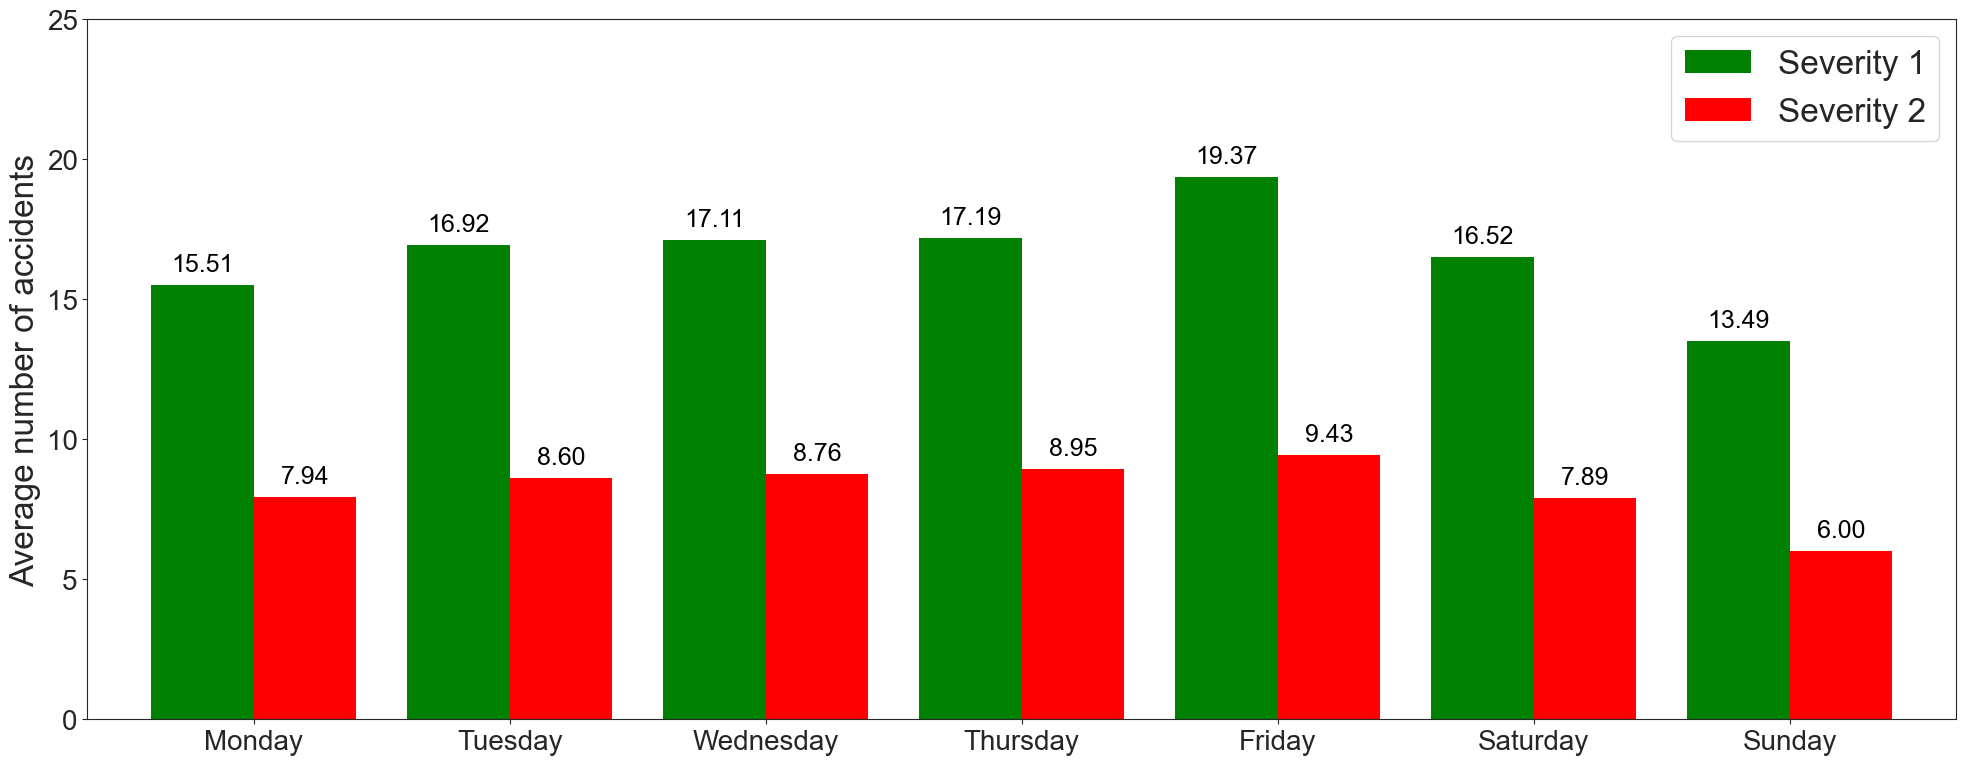

my matplotlib style has been reset.


In [664]:
dftmp=df.copy()
dftmp['d']=df['INCDATE'].dt.weekday_name
dftmp=pd.DataFrame(      dftmp.groupby(['SEVERITYCODE','d']).size()       )
dftmp.reset_index(inplace=True)
dftmp.columns = dftmp.columns.astype(str)
dftmp.rename(columns={"0": "Counts"},inplace=True)
dftmp = dftmp.pivot(index='d', columns='SEVERITYCODE', values='Counts')

sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sorterIndex = dict(zip(sorter,range(len(sorter))))

dftmp['Day_id'] = dftmp.index
dftmp['Day_id'] = dftmp['Day_id'].map(sorterIndex)

dftmp.sort_values('Day_id', inplace=True)

dftmp.drop(['Day_id'],axis=1, inplace=True)

dftmp.columns = dftmp.columns.astype(str)

dftmp['1']=dftmp['1']/(16*52)
dftmp['2']=dftmp['2']/(16*52)

sns.set_style('ticks') # change background to white background
ax = dftmp.plot(kind='bar', alpha=1, figsize=(20, 8), fontsize=14, 
               color=['green', 'red'],
                ylim=(0,25),
               width=0.8, linewidth=0
               )
#ax.set_title('Cost', fontsize=16)
ax.set_ylabel('Average number of accidents')
ax.set_xlabel('')
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.axes.yaxis.set_visible(True)
ax.legend(['Severity 1', 'Severity 2'],fontsize=24)
ax.set_xticklabels(dftmp.index, fontsize=20, rotation=0)

ax.tick_params(axis='y', labelsize=20 )
#ax.tick_params(axis='x', labelsize=18 )

a = np.array([-0.2,0.2])

for i, index in enumerate(dftmp.index):
    for j, column in enumerate(dftmp.columns):
        value = dftmp.iloc[i,j]
        b = np.zeros(2)
        b[j]=1
        sft=np.dot(a,b)
        #label = str(value)
        label = str(  "{:.2f}".format(  value   )   )
        
        ax.annotate(label,xy=(i+sft, value+0.5),fontsize=18,ha='center', rotation = 0, color = 'black') 

plt.tight_layout()
plt.savefig('sdow.pdf',dpi=200, bbox_inches='tight')
plt.show()
my_mpl()

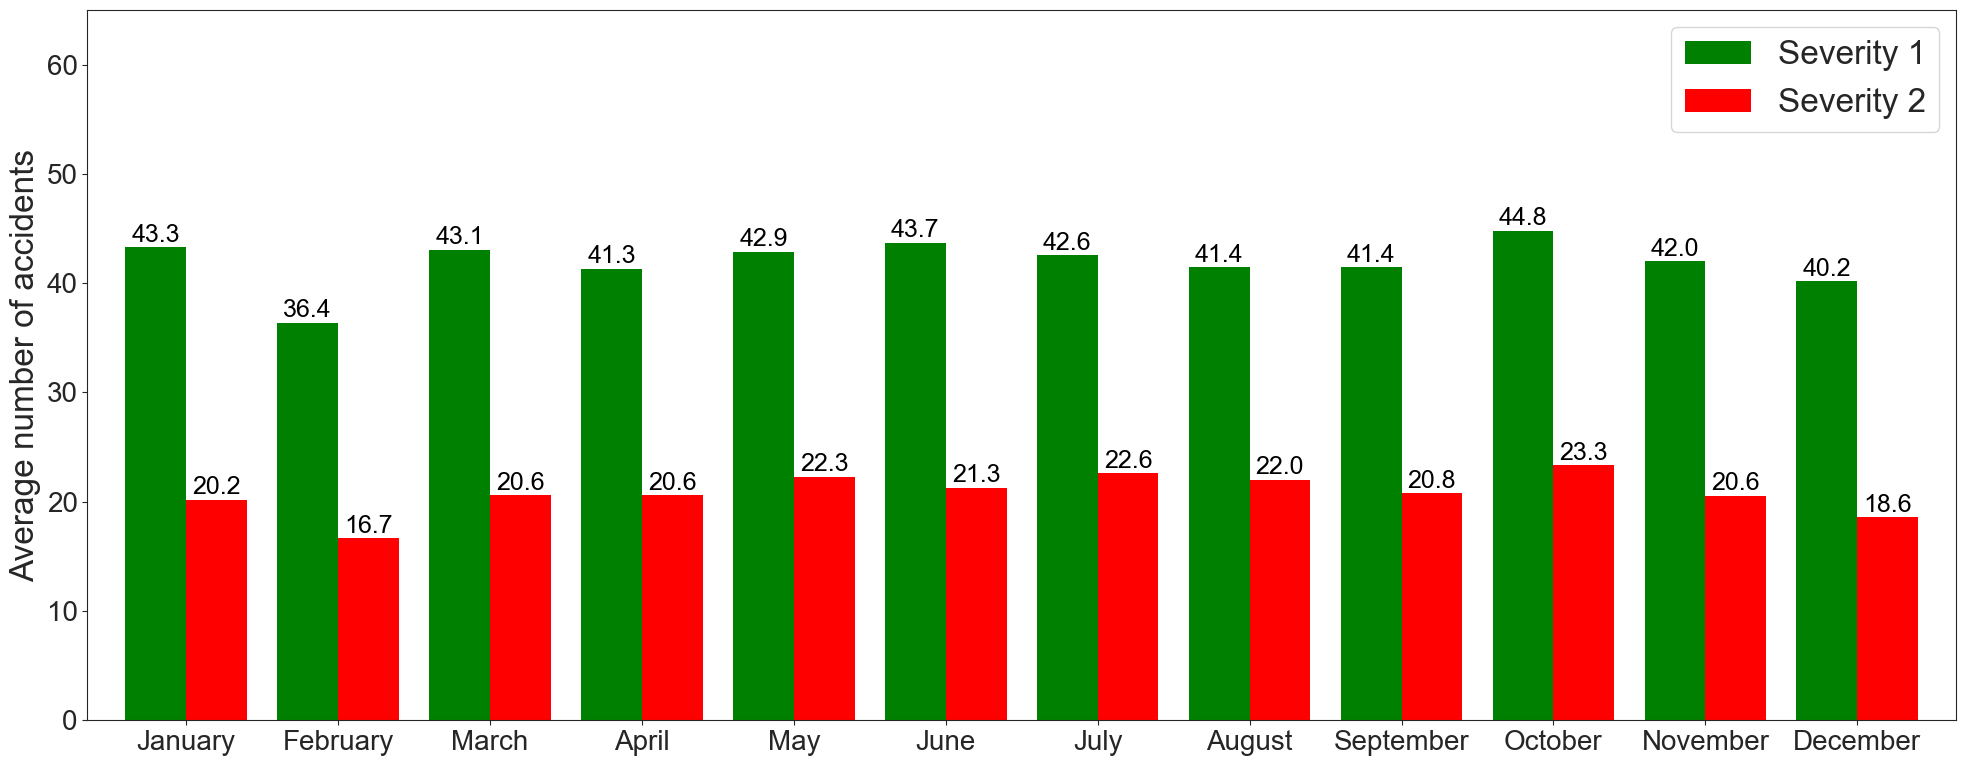

my matplotlib style has been reset.


In [665]:
dftmp=df.copy()
dftmp['m']= pd.to_datetime(dftmp['INCDATE'])


#df['Date'] = pd.to_datetime(df['Date'])

# You can format your date as you wish
dftmp['m'] = dftmp['m'].dt.strftime('%B')   #('%B-%Y')


dftmp=pd.DataFrame(      dftmp.groupby(['SEVERITYCODE','m']).size()       )
dftmp.reset_index(inplace=True)
dftmp.columns = dftmp.columns.astype(str)
dftmp.rename(columns={"0": "Counts"},inplace=True)
dftmp = dftmp.pivot(index='m', columns='SEVERITYCODE', values='Counts')

sorter = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sorterIndex = dict(zip(sorter,range(1, len(sorter)+1)))

dftmp['M_id'] = dftmp.index



dftmp['M_id'] = dftmp['M_id'].map(sorterIndex)

dftmp.sort_values('M_id', inplace=True)

dftmp.drop(['M_id'],axis=1, inplace=True)



dftmp.columns = dftmp.columns.astype(str)

dftmp['1']=dftmp['1']/(16*12)
dftmp['2']=dftmp['2']/(16*12)

sns.set_style('ticks') # change background to white background
ax = dftmp.plot(kind='bar', alpha=1, figsize=(20, 8), fontsize=14, 
               color=['green', 'red'],
                ylim=(0,65),
               width=0.8, linewidth=0
               )
#ax.set_title('Cost', fontsize=16)
ax.set_ylabel('Average number of accidents')
ax.set_xlabel('')
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.axes.yaxis.set_visible(True)
ax.legend(['Severity 1', 'Severity 2'],fontsize=24)
ax.set_xticklabels(dftmp.index, fontsize=20, rotation = 0 )

ax.tick_params(axis='y', labelsize=20, rotation = 0 )
#ax.tick_params(axis='x', labelsize=18 )

a = np.array([-0.2,0.2])

for i, index in enumerate(dftmp.index):
    for j, column in enumerate(dftmp.columns):
        value = dftmp.iloc[i,j]
        b = np.zeros(2)
        b[j]=1
        sft=np.dot(a,b)
        #label = str(value)
        label = str(  "{:.1f}".format(  value   )   )
        
        ax.annotate(label,xy=(i+sft, value+0.5),fontsize=18,ha='center', rotation = 0, color = 'black') 

plt.tight_layout()
plt.savefig('smoy.pdf',dpi=200, bbox_inches='tight')
plt.show()
my_mpl()

In [666]:
df.drop(['INCDATE', 'INCDTTM'], axis=1, inplace=True)
# let's view the first five elements and see how the dataframe was changed
df.head()

SEVERITYCODE           X          Y  INATTENTIONIND  UNDERINFL  SPEEDING  \
0             2 -122.323148  47.703140               0          0         0   
1             1 -122.347294  47.647172               0          0         0   
2             1 -122.334540  47.607871               0          0         0   
3             1 -122.334803  47.604803               0          0         0   
4             2 -122.306426  47.545739               0          0         0   

   ADDRTYPE_Block  ADDRTYPE_Intersection  WEATHER_Blowing Sand/Dirt  \
0               0                      1                          0   
1               1                      0                          0   
2               1                      0                          0   
3               1                      0                          0   
4               0                      1                          0   

   WEATHER_Clear  WEATHER_Fog/Smog/Smoke  WEATHER_Other  WEATHER_Overcast  \
0              0                       0              0                 1   
1              0                       0              0                 0   
2              0                       0              0                 1   
3              1                       0              0                 0   
4              0                       0              0                 0   

   WEATHER_Partly Cloudy  WEATHER_Raining  WEATHER_Severe Crosswind  \
0                      0                0                         0   
1                      0                1                         0   
2                      0                0                         0   
3                      0                0                         0   
4                      0                1                         0   

   WEATHER_Sleet/Hail/Freezing Rain  WEATHER_Snowing  ROADCOND_Dry  \
0                                 0                0             0   
1                                 0                0             0   
2                                 0                0             1   
3                                 0                0             1   
4                                 0                0             0   

   ROADCOND_Ice  ROADCOND_Oil  ROADCOND_Other  ROADCOND_Sand/Mud/Dirt  \
0             0             0               0                       0   
1             0             0               0                       0   
2             0             0               0                       0   
3             0             0               0                       0   
4             0             0               0                       0   

   ROADCOND_Snow/Slush  ROADCOND_Standing Water  ROADCOND_Wet  \
0                    0                        0             1   
1                    0                        0             1   
2                    0                        0             0   
3                    0                        0             0   
4                    0                        0             1   

   LIGHTCOND_Dark - No Street Lights  LIGHTCOND_Dark - Street Lights Off  \
0                                  0                                   0   
1                                  0                                   0   
2                                  0                                   0   
3                                  0                                   0   
4                                  0                                   0   

   LIGHTCOND_Dark - Street Lights On  LIGHTCOND_Dark - Unknown Lighting  \
0                                  0                                  0   
1                                  1                                  0   
2                                  0                                  0   
3                                  0                                  0   
4                                  0                                  0   

   LIGHTCOND_Dawn  LIGHTCOND_Daylight  LIGHTCOND_Dus

In [667]:
df.shape

(144480, 38)

In [668]:
df.rename(columns={"X": "Longitude", "Y": "Latitude"},inplace=True)

In [669]:
df.head()

SEVERITYCODE   Longitude   Latitude  INATTENTIONIND  UNDERINFL  SPEEDING  \
0             2 -122.323148  47.703140               0          0         0   
1             1 -122.347294  47.647172               0          0         0   
2             1 -122.334540  47.607871               0          0         0   
3             1 -122.334803  47.604803               0          0         0   
4             2 -122.306426  47.545739               0          0         0   

   ADDRTYPE_Block  ADDRTYPE_Intersection  WEATHER_Blowing Sand/Dirt  \
0               0                      1                          0   
1               1                      0                          0   
2               1                      0                          0   
3               1                      0                          0   
4               0                      1                          0   

   WEATHER_Clear  WEATHER_Fog/Smog/Smoke  WEATHER_Other  WEATHER_Overcast  \
0              0                       0              0                 1   
1              0                       0              0                 0   
2              0                       0              0                 1   
3              1                       0              0                 0   
4              0                       0              0                 0   

   WEATHER_Partly Cloudy  WEATHER_Raining  WEATHER_Severe Crosswind  \
0                      0                0                         0   
1                      0                1                         0   
2                      0                0                         0   
3                      0                0                         0   
4                      0                1                         0   

   WEATHER_Sleet/Hail/Freezing Rain  WEATHER_Snowing  ROADCOND_Dry  \
0                                 0                0             0   
1                                 0                0             0   
2                                 0                0             1   
3                                 0                0             1   
4                                 0                0             0   

   ROADCOND_Ice  ROADCOND_Oil  ROADCOND_Other  ROADCOND_Sand/Mud/Dirt  \
0             0             0               0                       0   
1             0             0               0                       0   
2             0             0               0                       0   
3             0             0               0                       0   
4             0             0               0                       0   

   ROADCOND_Snow/Slush  ROADCOND_Standing Water  ROADCOND_Wet  \
0                    0                        0             1   
1                    0                        0             1   
2                    0                        0             0   
3                    0                        0             0   
4                    0                        0             1   

   LIGHTCOND_Dark - No Street Lights  LIGHTCOND_Dark - Street Lights Off  \
0                                  0                                   0   
1                                  0                                   0   
2                                  0                                   0   
3                                  0                                   0   
4                                  0                                   0   

   LIGHTCOND_Dark - Street Lights On  LIGHTCOND_Dark - Unknown Lighting  \
0                                  0                                  0   
1                                  1                                  0   
2                                  0                                  0   
3                                  0                                  0   
4                                  0                                  0   

   LIGHTCOND_Dawn  LIGHTCOND_Daylight  LIGHTCOND_Dus

In [670]:
df.shape

(144480, 38)

## Some more feature engineering

In [671]:
df['Longitude_cos'] =   np.cos(df['Longitude']*np.pi/180)
df['Longitude_sin'] =   np.sin(df['Longitude']*np.pi/180)
df['Latitude_cos'] =    np.cos(df['Latitude']*np.pi/180)
df['Latitude_sin'] =    np.sin(df['Latitude']*np.pi/180)
df.drop(['Longitude', 'Latitude'], axis=1, inplace=True)
# let's view the first five elements and see how the dataframe was changed
df.head()

SEVERITYCODE   Longitude   Latitude  INATTENTIONIND  UNDERINFL  SPEEDING  \
0             2 -122.323148  47.703140               0          0         0   
1             1 -122.347294  47.647172               0          0         0   
2             1 -122.334540  47.607871               0          0         0   
3             1 -122.334803  47.604803               0          0         0   
4             2 -122.306426  47.545739               0          0         0   

   ADDRTYPE_Block  ADDRTYPE_Intersection  WEATHER_Blowing Sand/Dirt  \
0               0                      1                          0   
1               1                      0                          0   
2               1                      0                          0   
3               1                      0                          0   
4               0                      1                          0   

   WEATHER_Clear  WEATHER_Fog/Smog/Smoke  WEATHER_Other  WEATHER_Overcast  \
0              0                       0              0                 1   
1              0                       0              0                 0   
2              0                       0              0                 1   
3              1                       0              0                 0   
4              0                       0              0                 0   

   WEATHER_Partly Cloudy  WEATHER_Raining  WEATHER_Severe Crosswind  \
0                      0                0                         0   
1                      0                1                         0   
2                      0                0                         0   
3                      0                0                         0   
4                      0                1                         0   

   WEATHER_Sleet/Hail/Freezing Rain  WEATHER_Snowing  ROADCOND_Dry  \
0                                 0                0             0   
1                                 0                0             0   
2                                 0                0             1   
3                                 0                0             1   
4                                 0                0             0   

   ROADCOND_Ice  ROADCOND_Oil  ROADCOND_Other  ROADCOND_Sand/Mud/Dirt  \
0             0             0               0                       0   
1             0             0               0                       0   
2             0             0               0                       0   
3             0             0               0                       0   
4             0             0               0                       0   

   ROADCOND_Snow/Slush  ROADCOND_Standing Water  ROADCOND_Wet  \
0                    0                        0             1   
1                    0                        0             1   
2                    0                        0             0   
3                    0                        0             0   
4                    0                        0             1   

   LIGHTCOND_Dark - No Street Lights  LIGHTCOND_Dark - Street Lights Off  \
0                                  0                                   0   
1                                  0                                   0   
2                                  0                                   0   
3                                  0                                   0   
4                                  0                                   0   

   LIGHTCOND_Dark - Street Lights On  LIGHTCOND_Dark - Unknown Lighting  \
0                                  0                                  0   
1                                  1                                  0   
2                                  0                                  0   
3                                  0                                  0   
4                                  0                                  0   

   LIGHTCOND_Dawn  LIGHTCOND_Daylight  LIGHTCOND_Dus

# data is imbalanced

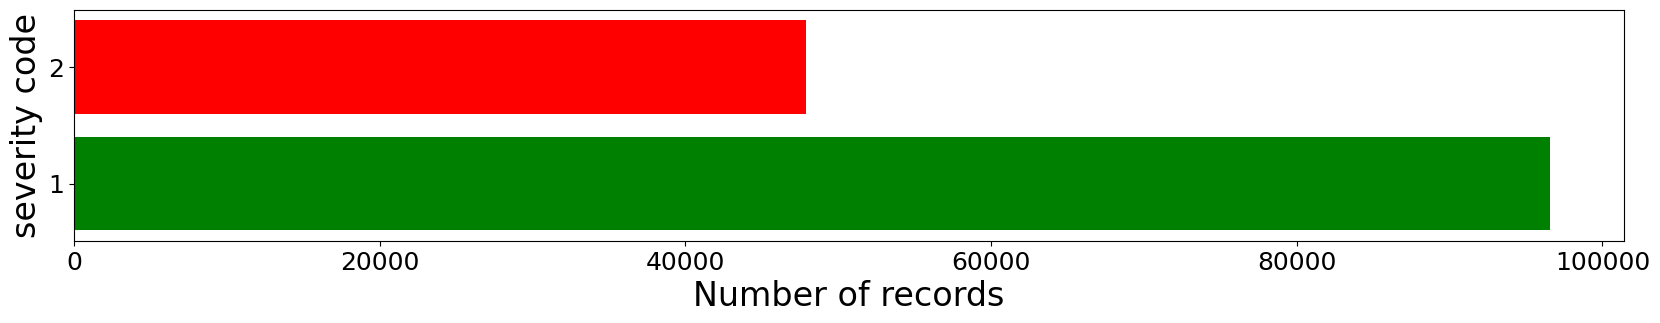

In [673]:
labels, counts = np.unique(df['SEVERITYCODE'], return_counts=True)
plt.figure(figsize=(20, 3))  
plt.barh(labels, counts, align='center', color=['green','red'])
plt.gca().set_yticks(labels)
#plt.title('Histogram of imbalanced severity code') # add a title to the histogram
plt.xlabel('Number of records') # add y-label
plt.ylabel('severity code') # add x-label
plt.savefig('imbalance.pdf',dpi=200,bbox_inches='tight')
plt.show()

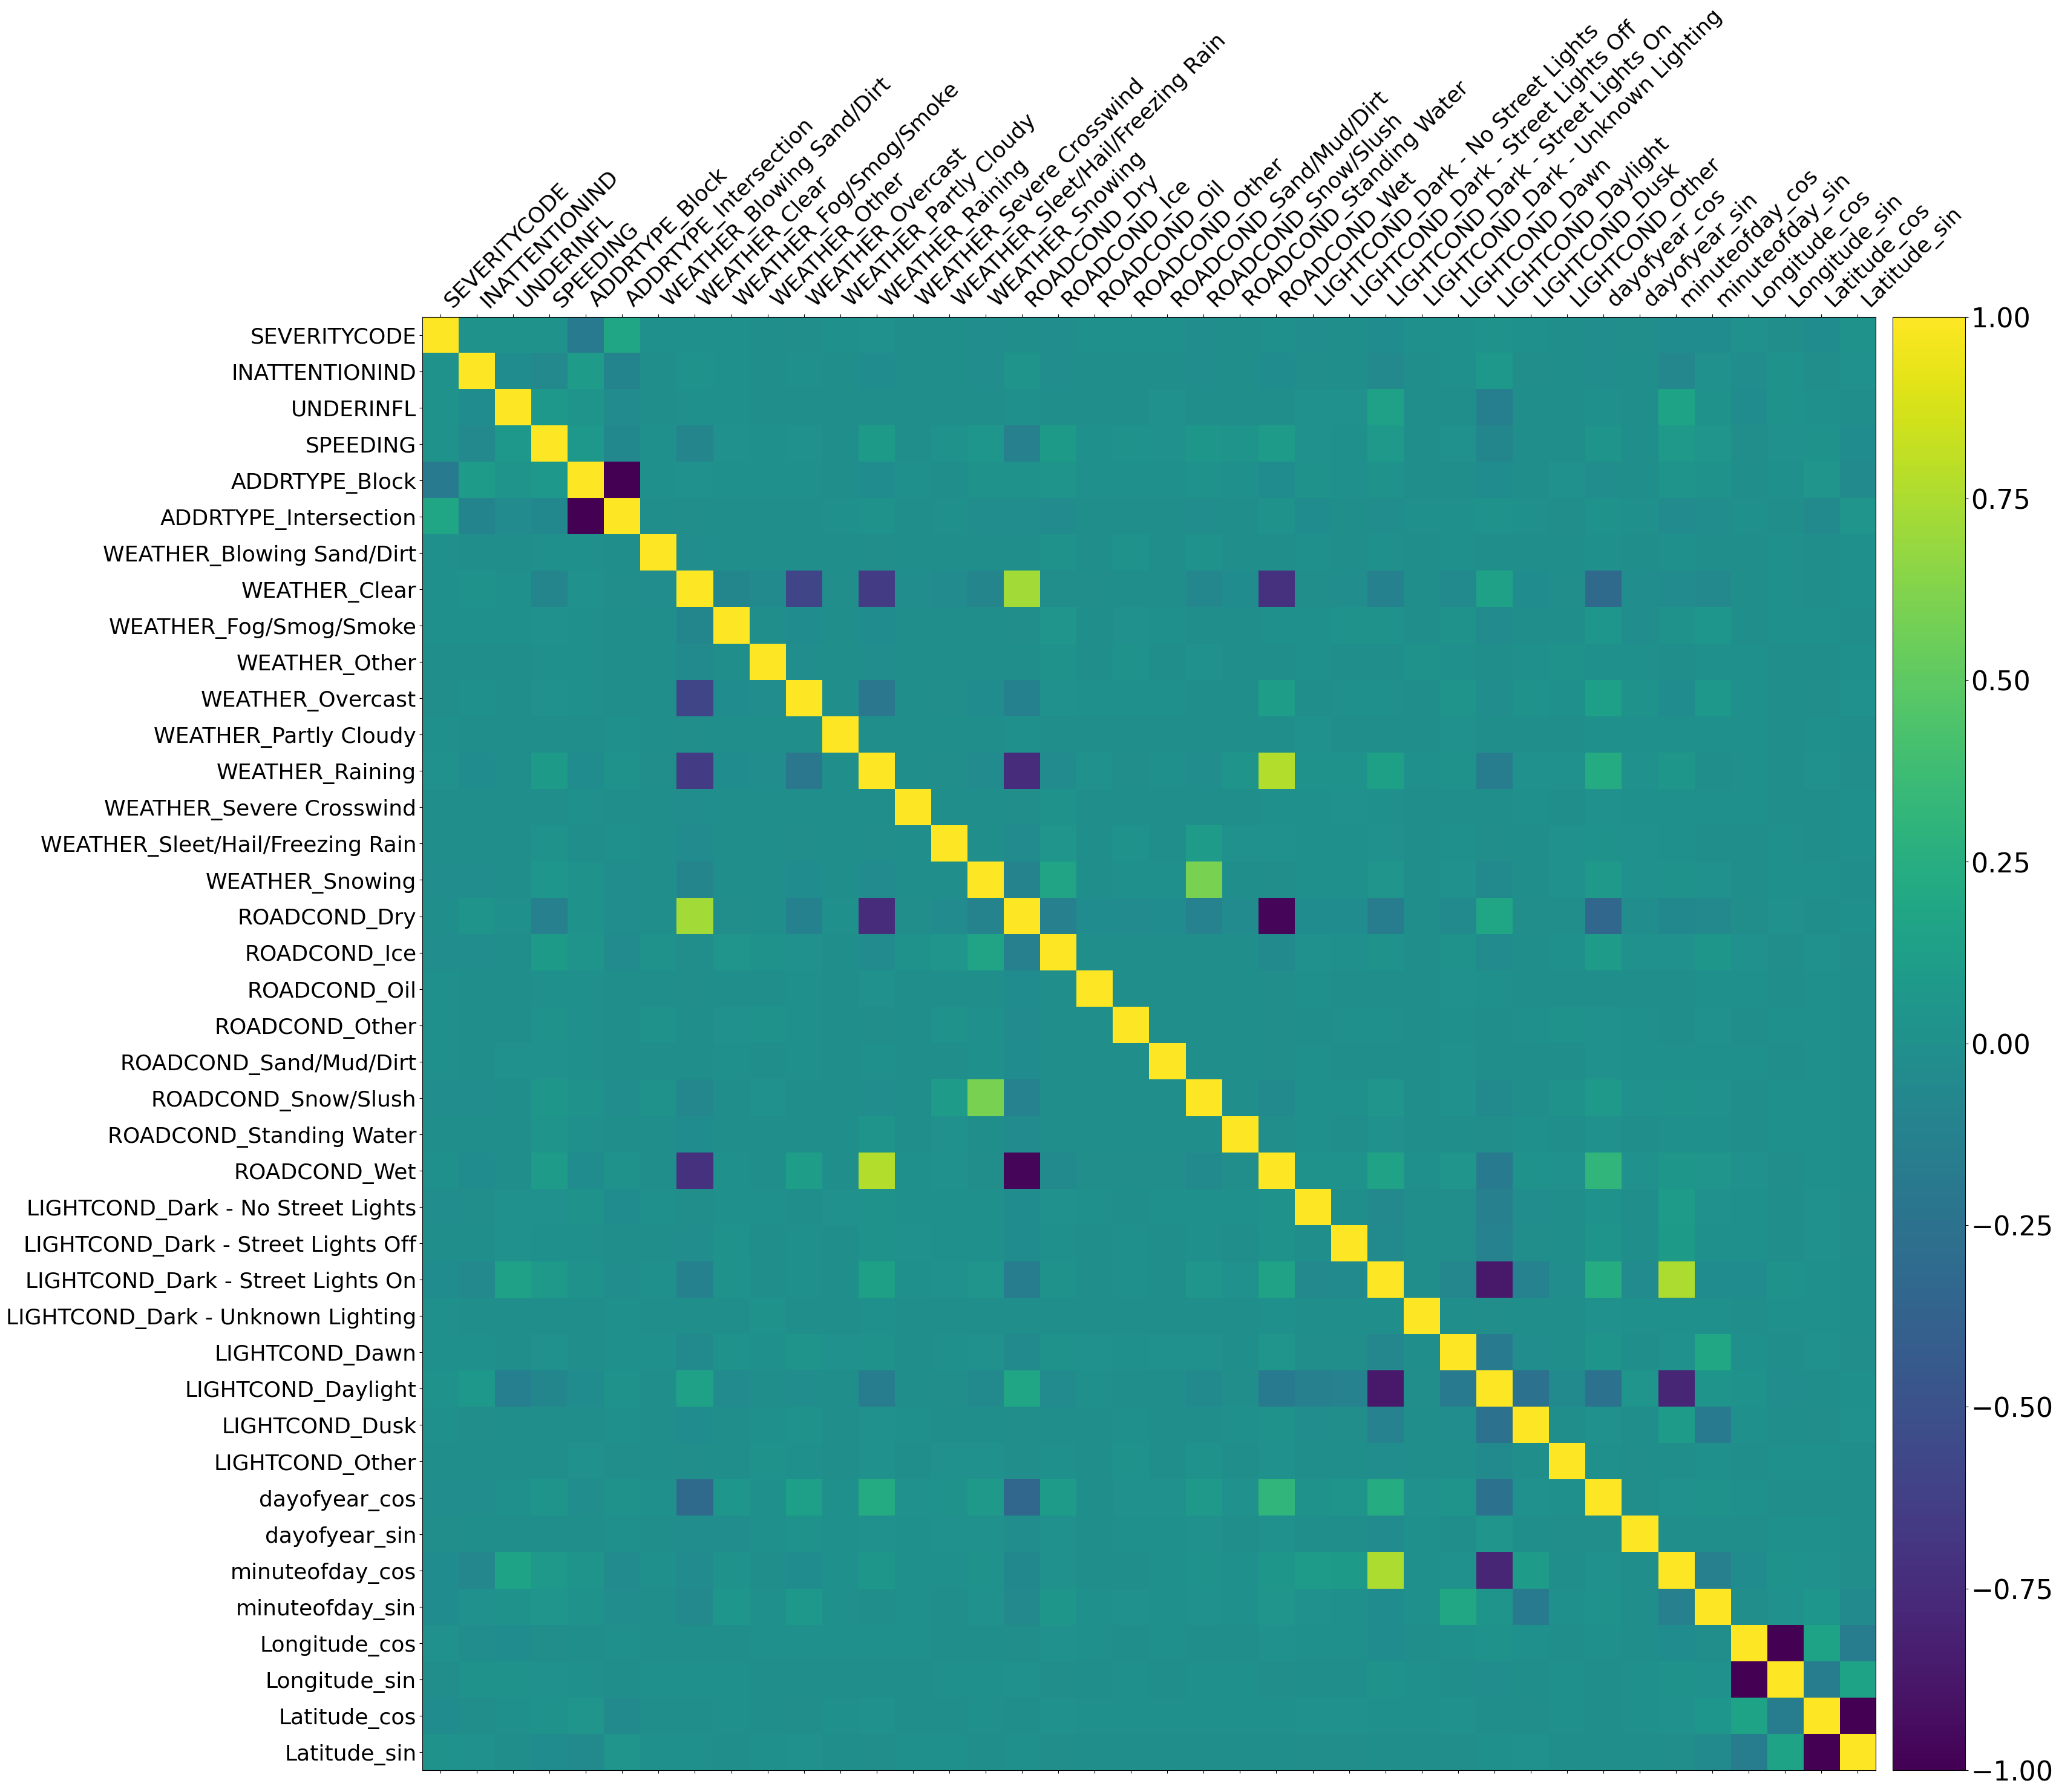

In [676]:
f = plt.figure(figsize=(35,31))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=26, rotation=45,horizontalalignment='left')
plt.yticks(range(df.shape[1]), df.columns, fontsize=26)
cb = plt.colorbar(fraction=0.05, pad=0.01)
cb.ax.tick_params(labelsize=32)
#plt.title('Correlation Matrix', fontsize=24)
plt.savefig('corr2.pdf',dpi=200,bbox_inches='tight')
plt.show()

# for simplicity, mark severity code 1 as 0, severity code 2 as 1.

In [677]:
df.SEVERITYCODE.replace(1, 0, inplace=True)
df.SEVERITYCODE.replace(2, 1, inplace=True)

In [678]:
y=df[['SEVERITYCODE']]
y.head()

SEVERITYCODE
0             1
1             0
2             0
3             0
4             1

In [679]:
X=df.iloc[:,1:]
X.head()

INATTENTIONIND  UNDERINFL  SPEEDING  ADDRTYPE_Block  ADDRTYPE_Intersection  \
0               0          0         0               0                      1   
1               0          0         0               1                      0   
2               0          0         0               1                      0   
3               0          0         0               1                      0   
4               0          0         0               0                      1   

   WEATHER_Blowing Sand/Dirt  WEATHER_Clear  WEATHER_Fog/Smog/Smoke  \
0                          0              0                       0   
1                          0              0                       0   
2                          0              0                       0   
3                          0              1                       0   
4                          0              0                       0   

   WEATHER_Other  WEATHER_Overcast  WEATHER_Partly Cloudy  WEATHER_Raining  \
0              0                 1                      0                0   
1              0                 0                      0                1   
2              0                 1                      0                0   
3              0                 0                      0                0   
4              0                 0                      0                1   

   WEATHER_Severe Crosswind  WEATHER_Sleet/Hail/Freezing Rain  \
0                         0                                 0   
1                         0                                 0   
2                         0                                 0   
3                         0                                 0   
4                         0                                 0   

   WEATHER_Snowing  ROADCOND_Dry  ROADCOND_Ice  ROADCOND_Oil  ROADCOND_Other  \
0                0             0             0             0               0   
1                0             0             0             0               0   
2                0             1             0             0               0   
3                0             1             0             0               0   
4                0             0             0             0               0   

   ROADCOND_Sand/Mud/Dirt  ROADCOND_Snow/Slush  ROADCOND_Standing Water  \
0                       0                    0                        0   
1                       0                    0                        0   
2                       0                    0                        0   
3                       0                    0                        0   
4                       0                    0                        0   

   ROADCOND_Wet  LIGHTCOND_Dark - No Street Lights  \
0             1                                  0   
1             1                                  0   
2             0                                  0   
3             0                                  0   
4             1                                  0   

   LIGHTCOND_Dark - Street Lights Off  LIGHTCOND_Dark - Street Lights On  \
0                                   0                                  0   
1                                   0                                  1   
2                                   0                                  0   
3                                   0                                  0   
4                                   0                                  0   

   LIGHTCOND_Dark - Unknown Lighting  LIGHTCOND_Dawn  LIGHTCOND_Daylight  \
0                                  0               0                   1   
1                                  0               0                   0   
2                                  0               0                   1   
3                                  0               0                   1   
4                                  0               0                   1   

   LIGHTCOND_Dusk  LIGHTCOND_Other  dayofyear_cos  dayofye

In [680]:
X.shape

(144480, 39)

# Shuffle and select data for training and testing

In [681]:
#nsample=20000   #len(df)
#dfspl=df.sample(nsample)
dfspl=df.sample(frac=0.5)
X=dfspl.iloc[:,1:]
y=dfspl[['SEVERITYCODE']]

# split data first

In [682]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (57792, 39) (57792, 1)
Test set: (14448, 39) (14448, 1)


# balance the X_train

In [683]:
dfnow = pd.concat([y_train,X_train],axis=1)
dfnow.groupby('SEVERITYCODE').count()

INATTENTIONIND  UNDERINFL  SPEEDING  ADDRTYPE_Block  \
SEVERITYCODE                                                        
0                      38716      38716     38716           38716   
1                      19076      19076     19076           19076   

              ADDRTYPE_Intersection  WEATHER_Blowing Sand/Dirt  WEATHER_Clear  \
SEVERITYCODE                                                                    
0                             38716                      38716          38716   
1                             19076                      19076          19076   

              WEATHER_Fog/Smog/Smoke  WEATHER_Other  WEATHER_Overcast  \
SEVERITYCODE                                                            
0                              38716          38716             38716   
1                              19076          19076             19076   

              WEATHER_Partly Cloudy  WEATHER_Raining  \
SEVERITYCODE                                           
0                             38716            38716   
1                             19076            19076   

              WEATHER_Severe Crosswind  WEATHER_Sleet/Hail/Freezing Rain  \
SEVERITYCODE                                                               
0                                38716                             38716   
1                                19076                             19076   

              WEATHER_Snowing  ROADCOND_Dry  ROADCOND_Ice  ROADCOND_Oil  \
SEVERITYCODE                                                              
0                       38716         38716         38716         38716   
1                       19076         19076         19076         19076   

              ROADCOND_Other  ROADCOND_Sand/Mud/Dirt  ROADCOND_Snow/Slush  \
SEVERITYCODE                                                                
0                      38716                   38716                38716   
1                      19076                   19076                19076   

              ROADCOND_Standing Water  ROADCOND_Wet  \
SEVERITYCODE                                          
0                               38716         38716   
1                               19076         19076   

              LIGHTCOND_Dark - No Street Lights  \
SEVERITYCODE                                      
0                                         38716   
1                                         19076   

              LIGHTCOND_Dark - Street Lights Off  \
SEVERITYCODE                                       
0                                          38716   
1                                          19076   

              LIGHTCOND_Dark - Street Lights On  \
SEVERITYCODE                                      
0                                         38716   
1                                         19076   

              LIGHTCOND_Dark - Unknown Lighting  LIGHTCOND_Dawn  \
SEVERITYCODE                                                      
0                                         38716           38716   
1                                         19076           19076   

              LIGHTCOND_Daylight  LIGHTCOND_Dusk  LIGHTCOND_Other  \
SEVERITYCODE                                                        
0                          38716           38716            38716   
1                          19076           19076            19076   

              dayofyear_cos  dayofyear_sin  minuteofday_cos  minuteofday_sin  \
SEVERITYCODE                                                                   
0                     38716          38716            38716            38716   
1                     19076          19076            19076            19076   

              Longitude_cos  Longitude_sin  Latitude_cos  Latitude_sin  
SEVERITYCODE                                                            
0                     38716          38716         38716         38716  
1                     19076          19076         19

## up sampling

In [684]:
# Separate majority and minority classes
dfnow_majority = dfnow[dfnow.SEVERITYCODE==0]
dfnow_minority = dfnow[dfnow.SEVERITYCODE==1]
 
# Upsample minority class
dfnow_minority_upsampled = resample(dfnow_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(dfnow_majority),    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
dfnow_upsampled = pd.concat([dfnow_majority, dfnow_minority_upsampled])
 
# Display new class counts
dfnow_upsampled.SEVERITYCODE.value_counts()
# Name: balance, dtype: int64
y_train=dfnow_upsampled['SEVERITYCODE']
X_train=dfnow_upsampled.iloc[:,1:]

# Normalize X_train and X_test

In [685]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [686]:
scaler.mean_

array([ 1.78595413e-01,  1.86873644e-02,  5.18132038e-02,  5.98486414e-01,
        4.01513586e-01,  2.58291146e-04,  6.43971485e-01,  3.75813617e-03,
        1.09773737e-03,  1.54613080e-01,  7.74873437e-05,  1.91342081e-01,
        1.54974687e-04,  5.68240521e-04,  4.15848745e-03,  7.15673107e-01,
        6.49602232e-03,  3.22863932e-04,  5.68240521e-04,  4.90753177e-04,
        4.27471846e-03,  5.55325963e-04,  2.71618969e-01,  7.87787995e-03,
        6.72848435e-03,  2.66853497e-01,  1.42060130e-04,  1.45288770e-02,
        6.71298688e-01,  3.16664945e-02,  9.04019010e-04, -1.91563133e-02,
       -8.66002183e-03, -2.50719830e-01, -2.50972716e-01, -5.34799430e-01,
       -8.44978876e-01,  6.74054800e-01,  7.38680666e-01])

In [687]:
X_train_scaled = scaler.transform(X_train)

In [688]:
X_train_scaled

array([[-0.46629052, -0.13799722, -0.23376165, ...,  0.86987273,
        -1.49374194,  1.49264447],
       [ 2.14458573, -0.13799722, -0.23376165, ..., -0.19327892,
         0.16821047, -0.16725009],
       [-0.46629052, -0.13799722, -0.23376165, ...,  0.82671794,
         0.072845  , -0.07185285],
       ...,
       [-0.46629052, -0.13799722, -0.23376165, ..., -0.80754411,
         0.22758128, -0.22664991],
       [-0.46629052, -0.13799722, -0.23376165, ...,  1.63579501,
        -0.83746313,  0.83783974],
       [-0.46629052,  7.24652289,  4.27786158, ...,  0.19510415,
         0.31445721, -0.31358105]])

In [689]:
X_test_scaled = scaler.transform(X_test)

# 2. Train Models

# Logistic Regression

In [690]:
from sklearn.linear_model import LogisticRegression
start=time.time()
LR_model = LogisticRegression(C=0.03, solver='liblinear').fit(X_train_scaled,y_train)
print("training time cost is: ",time.time()- start, "seconds")

start=time.time()
LR_yhat = LR_model.predict(X_test_scaled)
print("test time cost is: ",time.time()- start, "seconds")


LR_yhat_prob = LR_model.predict_proba(X_test_scaled)
print("LR Jaccard index: %.2f" % jaccard_score(y_test, LR_yhat))
print("LR F1-score: %.2f" % f1_score(y_test, LR_yhat, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(y_test, LR_yhat_prob))



LR_yhat_train = LR_model.predict(X_train_scaled)
LR_yhat_train_prob = LR_model.predict_proba(X_train_scaled)
print("LR Jaccard train index: %.2f" % jaccard_score(y_train, LR_yhat_train))
print("LR F1-score train: %.2f" % f1_score(y_train, LR_yhat_train, average='weighted') )
print("LR LogLoss train: %.2f" % log_loss(y_train, LR_yhat_train_prob))

print("Train set Accuracy: ", metrics.accuracy_score(y_train, LR_yhat_train))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, LR_yhat))

print (classification_report(y_test, LR_yhat))

unique, counts = np.unique(LR_yhat, return_counts=True)
print(dict(zip(unique, counts)))
unique, counts = np.unique(LR_yhat_train, return_counts=True)
print(dict(zip(unique, counts)))

training time cost is:  0.5329976081848145 seconds
test time cost is:  0.001001596450805664 seconds
LR Jaccard index: 0.32
LR F1-score: 0.62
LR LogLoss: 0.67
LR Jaccard train index: 0.41
LR F1-score train: 0.60
LR LogLoss train: 0.67
Train set Accuracy:  0.5975307366463478
Test set Accuracy:  0.614202657807309
              precision    recall  f1-score   support

           0       0.75      0.64      0.69      9667
           1       0.43      0.55      0.49      4781

    accuracy                           0.61     14448
   macro avg       0.59      0.60      0.59     14448
weighted avg       0.64      0.61      0.62     14448

{0: 8351, 1: 6097}
{0: 42544, 1: 34888}


In [691]:
dflr=LR_model.coef_
dflr = list(map(float, chain.from_iterable(  dflr.tolist()   )))
dflr=np.array(dflr)
absdflr=abs(dflr)
labels = dfnow.columns.values.tolist()
labels.pop(0)
labelsa=np.array(labels)

my matplotlib style has been reset.


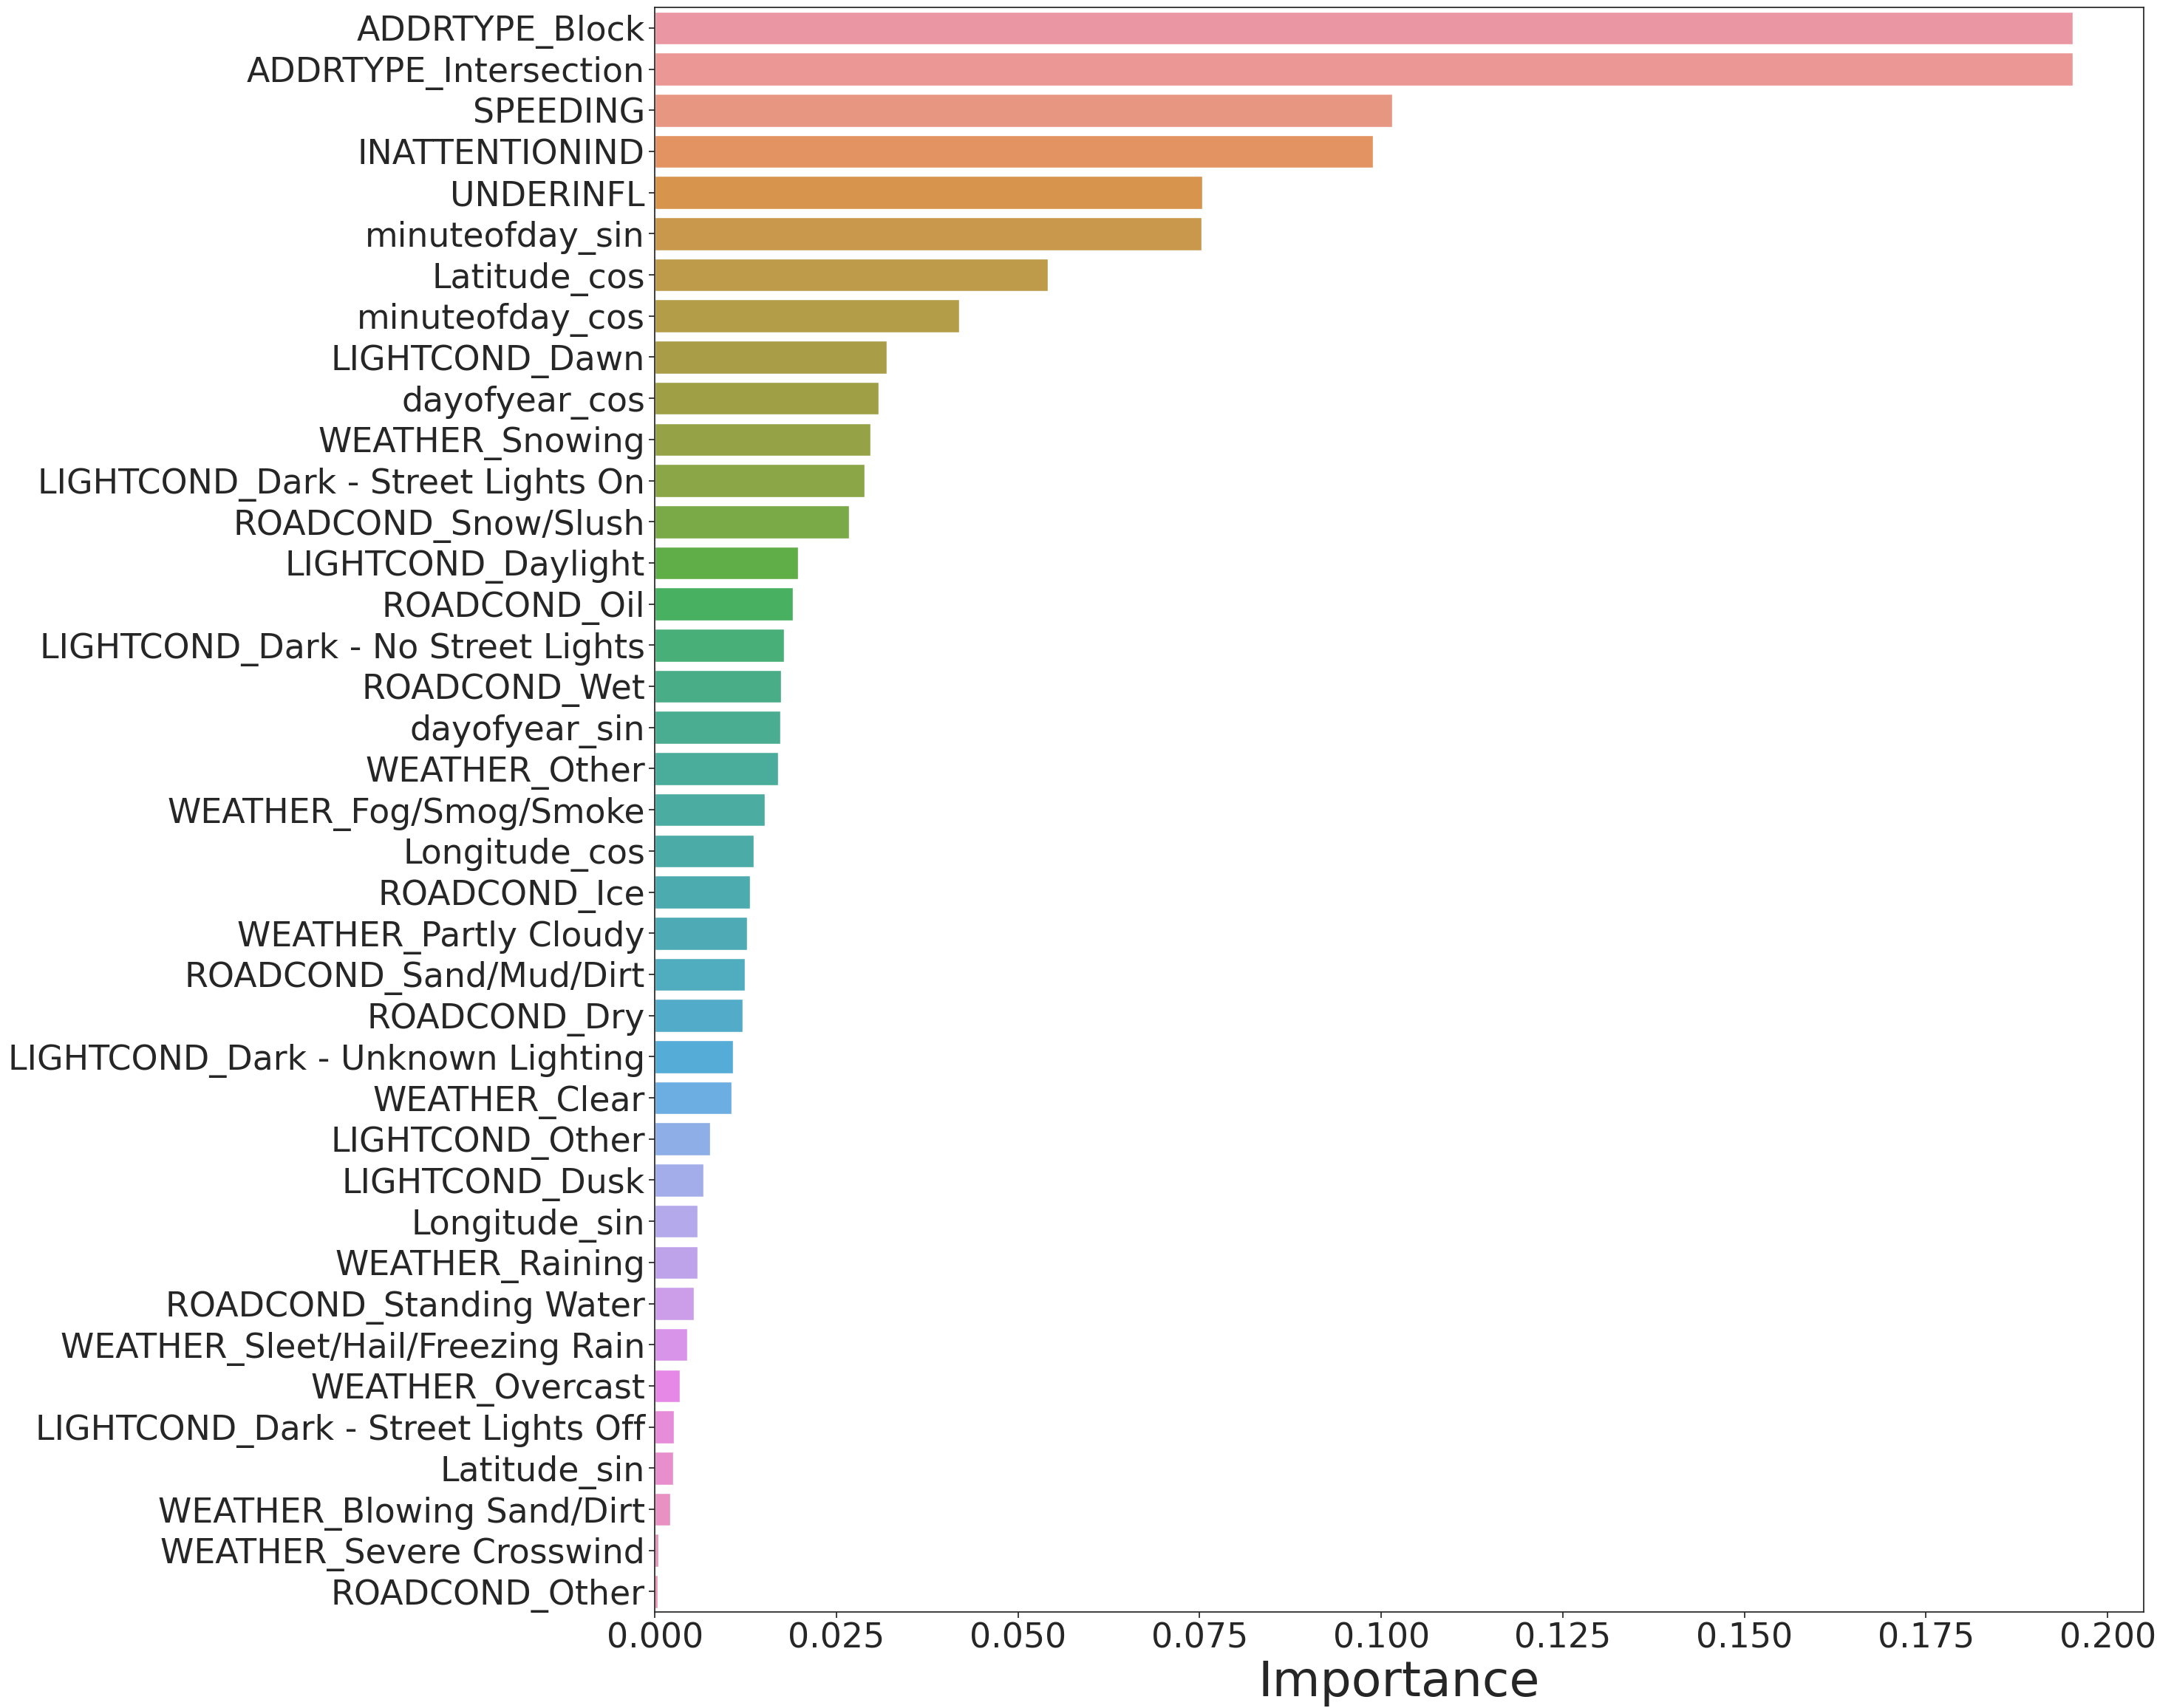

In [692]:
sns.set(font_scale=3)
#sns.set_context("poster")
sns.set_style('ticks')
#plt.style.use('default')
dfbar = pd.DataFrame({"Features":labelsa,
                  "Importance":absdflr})
plt.figure(figsize=(30,24))
# make barplot and sort bars
sns.barplot(x='Importance',
            y="Features", 
            data=dfbar, 
            order=dfbar.sort_values('Importance',ascending = False).Features)
# set labels
plt.xlabel("Importance", size=48)
plt.ylabel("Features", size=48)
#plt.title("Sort Bars in Barplot in Ascending Order", size=18)
plt.tight_layout()
plt.savefig("features.pdf", dpi=200,bbox_inches='tight')
my_mpl() # must to reset my mpl settings. Otherwise sns will mess things up

# Decision Tree

In [694]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
start = time.time()
DT_model.fit(X_train_scaled,y_train)
print("training time cost is: ",time.time()- start, "seconds")

start = time.time()
DT_yhat = DT_model.predict(X_test_scaled)
print("test cost is: ",time.time()- start, "seconds")


print("DT Jaccard index: %.2f" % jaccard_score(y_test, DT_yhat))
print("DT F1-score: %.2f" % f1_score(y_test, DT_yhat, average='weighted') )

DT_yhat_train = DT_model.predict(X_train_scaled)
print("DT train Jaccard index: %.2f" % jaccard_score(y_train, DT_yhat_train))
print("DT train F1-score: %.2f" % f1_score(y_train, DT_yhat_train, average='weighted') )

print("Train set Accuracy: ", metrics.accuracy_score(y_train, DT_yhat_train))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, DT_yhat))

print (classification_report(y_test, DT_yhat))

unique, counts = np.unique(DT_yhat, return_counts=True)
print(dict(zip(unique, counts)))
unique, counts = np.unique(y_test, return_counts=True)
print(dict(zip(unique, counts)))

training time cost is:  0.6150586605072021 seconds
test cost is:  0.001979351043701172 seconds
DT Jaccard index: 0.32
DT F1-score: 0.60
DT train Jaccard index: 0.46
DT train F1-score: 0.63
Train set Accuracy:  0.6264851740882322
Test set Accuracy:  0.5858942414174972
              precision    recall  f1-score   support

           0       0.74      0.59      0.65      9667
           1       0.41      0.59      0.48      4781

    accuracy                           0.59     14448
   macro avg       0.58      0.59      0.57     14448
weighted avg       0.63      0.59      0.60     14448

{0: 7638, 1: 6810}
{0: 9667, 1: 4781}


# XGBoost

In [695]:
from xgboost import XGBClassifier

XGB_model = XGBClassifier()

start=time.time()
XGB_model.fit(X_train_scaled, y_train)
print("training time cost is: ",time.time()- start, "seconds")

start=time.time()
XGB_yhat = XGB_model.predict(X_test_scaled)
print("test time cost is: ",time.time()- start, "seconds")


print("XGB Jaccard index: %.2f" % jaccard_score(y_test, XGB_yhat))
print("XGB F1-score: %.2f" % f1_score(y_test, XGB_yhat, average='weighted') )

XGB_yhat_train = DT_model.predict(X_train_scaled)
print("XGB train Jaccard index: %.2f" % jaccard_score(y_train, XGB_yhat_train))
print("XGB train F1-score: %.2f" % f1_score(y_train, XGB_yhat_train, average='weighted') )

print("Train set Accuracy: ", metrics.accuracy_score(y_train, XGB_yhat_train))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, XGB_yhat))

print (classification_report(y_test, XGB_yhat))

training time cost is:  3.9733147621154785 seconds
test time cost is:  0.03899884223937988 seconds
XGB Jaccard index: 0.31
XGB F1-score: 0.62
XGB train Jaccard index: 0.46
XGB train F1-score: 0.63
Train set Accuracy:  0.6264851740882322
Test set Accuracy:  0.6058970099667774
              precision    recall  f1-score   support

           0       0.74      0.64      0.69      9667
           1       0.42      0.54      0.47      4781

    accuracy                           0.61     14448
   macro avg       0.58      0.59      0.58     14448
weighted avg       0.63      0.61      0.62     14448



In [696]:
unique, counts = np.unique(XGB_yhat, return_counts=True)
print(dict(zip(unique, counts)))

{0: 8419, 1: 6029}


## Random Forest 

In [697]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier()

start = time.time()
RF_model.fit(X_train_scaled, y_train) 
print("training time cost is: ", time.time() - start, "seconds")

start = time.time()
RF_yhat = RF_model.predict(X_test_scaled)
print("test time cost is: ", time.time() - start, "seconds")


print("RF Jaccard index: %.2f" % jaccard_score(y_test, RF_yhat))
print("RF F1-score: %.2f" % f1_score(y_test, RF_yhat, average='weighted') )


RF_yhat_train = RF_model.predict(X_train_scaled)
print("RF train Jaccard index: %.2f" % jaccard_score(y_train, RF_yhat_train))
print("RF train F1-score: %.2f" % f1_score(y_train, RF_yhat_train, average='weighted') )


print("Train set Accuracy: ", metrics.accuracy_score(y_train, RF_yhat_train))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, RF_yhat))
print (classification_report(y_test, RF_yhat))

training time cost is:  16.31733536720276 seconds
test time cost is:  0.3539905548095703 seconds
RF Jaccard index: 0.17
RF F1-score: 0.60
RF train Jaccard index: 1.00
RF train F1-score: 1.00
Train set Accuracy:  0.9999741708854221
Test set Accuracy:  0.6388427464008859
              precision    recall  f1-score   support

           0       0.69      0.85      0.76      9667
           1       0.41      0.22      0.29      4781

    accuracy                           0.64     14448
   macro avg       0.55      0.53      0.52     14448
weighted avg       0.60      0.64      0.60     14448



In [698]:
unique, counts = np.unique(RF_yhat, return_counts=True)
print(dict(zip(unique, counts)))

{0: 11901, 1: 2547}


# K neighbour

In [699]:
from sklearn.neighbors import KNeighborsClassifier

Ks = 500
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
plt.figure(figsize=(12, 8)) 
for n in range(1,Ks,2):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train_scaled,y_train)
    K_yhat=neigh.predict(X_test_scaled)
    mean_acc[n-1] = metrics.accuracy_score(y_test, K_yhat)
    plt.plot([n], [mean_acc[n-1]], marker='o', markersize=5, color="green")
    print(n,mean_acc[n-1])

#plt.plot(range(1,Ks,10),mean_acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1 ) 

In [700]:
k = 500 # mean_acc.argmax()+1


#Train Model and Predict  
start = time.time()
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train_scaled,y_train)
print("training time cost is: ",time.time()- start, "seconds")

start = time.time()
K_yhat = neigh.predict(X_test_scaled)
print("test time cost is: ",time.time()- start, "seconds")

print("KNN Jaccard index: %.2f" % jaccard_score(y_test, K_yhat))
print("KNN F1-score: %.2f" % f1_score(y_test, K_yhat, average='weighted') )

K_yhat_train = neigh.predict(X_train_scaled)

print("train Jaccard index: %.2f" % jaccard_score(y_train, K_yhat_train))
print("train F1-score: %.2f" % f1_score(y_train, K_yhat_train, average='weighted') )

print("Train set Accuracy: ", metrics.accuracy_score(y_train, K_yhat_train))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, K_yhat))

print (classification_report(y_test, K_yhat))

unique, counts = np.unique(K_yhat, return_counts=True)
print(dict(zip(unique, counts)))

training time cost is:  15.785300970077515 seconds
test time cost is:  87.09534287452698 seconds
KNN Jaccard index: 0.33
KNN F1-score: 0.62
train Jaccard index: 0.42
train F1-score: 0.60
Train set Accuracy:  0.5996487240417399
Test set Accuracy:  0.6056201550387597
              precision    recall  f1-score   support

           0       0.75      0.62      0.68      9667
           1       0.43      0.58      0.49      4781

    accuracy                           0.61     14448
   macro avg       0.59      0.60      0.58     14448
weighted avg       0.64      0.61      0.62     14448

{0: 8029, 1: 6419}


## Support Vector Machine

In [701]:
from sklearn import svm
SVM_model = svm.SVC(kernel='rbf')

start = time.time()
SVM_model.fit(X_train_scaled, y_train) 
print("training time cost is: ",time.time()- start, "seconds")

start = time.time()
SVM_yhat = SVM_model.predict(X_test_scaled)
print("test time cost is: ",time.time()- start, "seconds")

print("SVM Jaccard index: %.2f" % jaccard_score(y_test, SVM_yhat))
print("SVM F1-score: %.2f" % f1_score(y_test, SVM_yhat, average='weighted') )

SVM_yhat_train = SVM_model.predict(X_train_scaled)

print("train Jaccard index: %.2f" % jaccard_score(y_train, SVM_yhat_train))
print("train F1-score: %.2f" % f1_score(y_train, SVM_yhat_train, average='weighted') )

print("Train set Accuracy: ", metrics.accuracy_score(y_train, SVM_yhat_train))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, SVM_yhat))

print (classification_report(y_test, SVM_yhat))

unique, counts = np.unique(SVM_yhat, return_counts=True)
print(dict(zip(unique, counts)))

training time cost is:  702.7976183891296 seconds
test time cost is:  42.69412612915039 seconds
SVM Jaccard index: 0.32
SVM F1-score: 0.62
train Jaccard index: 0.42
train F1-score: 0.61
Train set Accuracy:  0.6100320281020767
Test set Accuracy:  0.6102574750830565
              precision    recall  f1-score   support

           0       0.74      0.64      0.69      9667
           1       0.43      0.56      0.49      4781

    accuracy                           0.61     14448
   macro avg       0.59      0.60      0.59     14448
weighted avg       0.64      0.61      0.62     14448

{0: 8254, 1: 6194}


# Plot

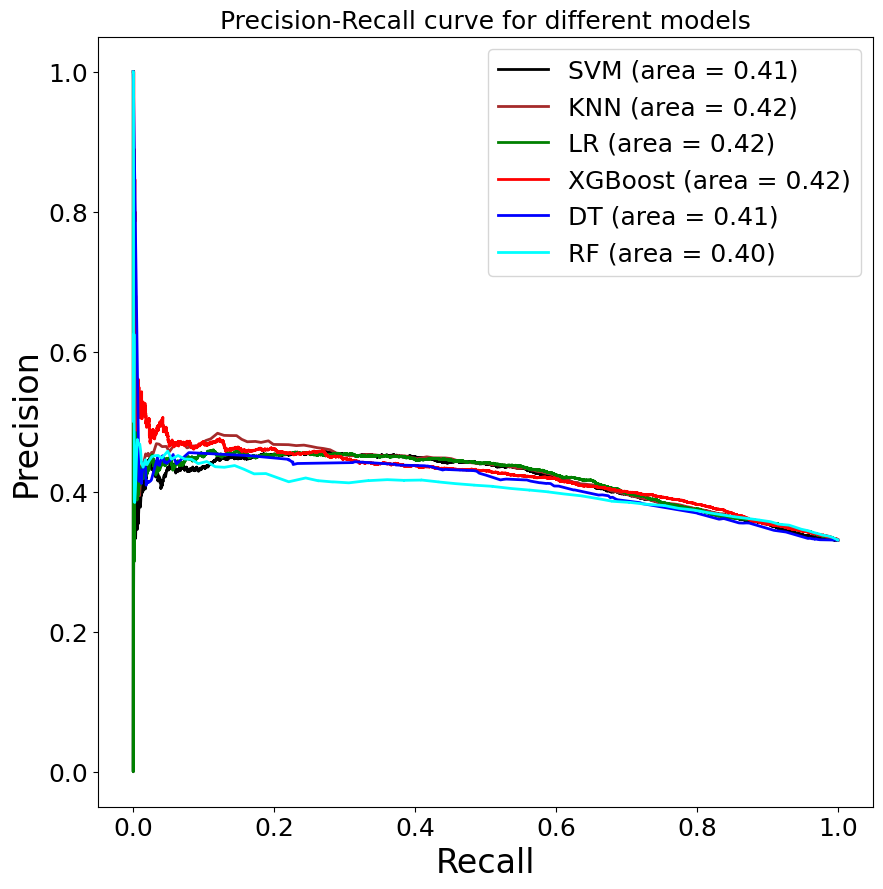

In [702]:
y_test1 = y_test.copy()

n=1 

LR_y_score = LR_model.decision_function(X_test_scaled)
LR_precision, LR_recall, _ = precision_recall_curve(y_test1, LR_y_score, pos_label=LR_model.classes_[1])
LR_auc = auc(LR_recall, LR_precision)

DT_probs = DT_model.predict_proba(X_test_scaled)[:,n]
DT_precision, DT_recall, _ = precision_recall_curve(y_test1, DT_probs)
DT_auc = auc(DT_recall, DT_precision)

XGB_probs = XGB_model.predict_proba(X_test_scaled)[:,n]
XGB_precision, XGB_recall, _ = precision_recall_curve(y_test1, XGB_probs)
XGB_auc = auc(XGB_recall, XGB_precision)

RF_probs = RF_model.predict_proba(X_test_scaled)[:,n]
RF_precision, RF_recall, _ = precision_recall_curve(y_test1, RF_probs)
RF_auc = auc(RF_recall, RF_precision)

neigh_probs = neigh.predict_proba(X_test_scaled)[:,n]
neigh_precision, neigh_recall, _ = precision_recall_curve(y_test1, neigh_probs)
neigh_auc = auc(neigh_recall, neigh_precision)

#SVM_y_score = SVM_model.decision_function(X_test_scaled)
SVM_y_score = SVM_model.decision_function(X_test_scaled)
SVM_precision, SVM_recall, _ = precision_recall_curve(y_test1, SVM_y_score, pos_label=SVM_model.classes_[1])
SVM_auc = auc(SVM_recall, SVM_precision)


plt.figure(figsize=(10, 10))  
plt.plot(SVM_recall, SVM_precision, color='black', lw=2, label='SVM (area = %0.2f)' % SVM_auc)
plt.plot(neigh_recall, neigh_precision, color='brown', lw=2, label='KNN (area = %0.2f)' % neigh_auc)
plt.plot(LR_recall, LR_precision, color='green', lw=2, label='LR (area = %0.2f)' % LR_auc)
plt.plot(XGB_recall, XGB_precision, color='red', lw=2, label='XGBoost (area = %0.2f)' % XGB_auc)
plt.plot(DT_recall, DT_precision, color='blue', lw=2, label='DT (area = %0.2f)' % DT_auc)
plt.plot(RF_recall, RF_precision, color='cyan', lw=2, label='RF (area = %0.2f)' % RF_auc)


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for different models')
plt.legend()
plt.savefig('Precision-Recall01.pdf',dpi=600, bbox_inches='tight')
plt.show()


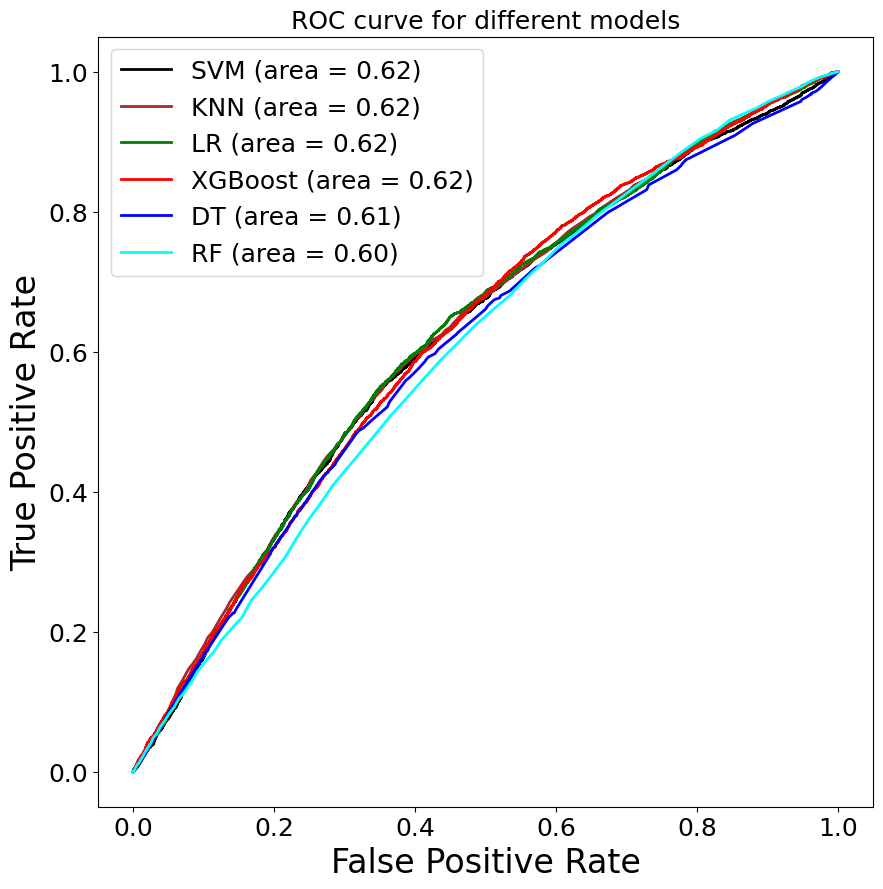

In [703]:
y_test1 = y_test.copy()

n=1

LR_y_score = LR_model.decision_function(X_test_scaled)
LR_fpr, LR_tpr, _ = roc_curve(y_test1, LR_y_score, pos_label=LR_model.classes_[1])
LR_auc = auc(LR_fpr, LR_tpr)

DT_probs = DT_model.predict_proba(X_test_scaled)[:,n]
DT_fpr, DT_tpr, _ = roc_curve(y_test1, DT_probs)
DT_auc = auc(DT_fpr, DT_tpr)

XGB_probs = XGB_model.predict_proba(X_test_scaled)[:,n]
XGB_fpr, XGB_tpr, _ = roc_curve(y_test1, XGB_probs)
XGB_auc = auc(XGB_fpr, XGB_tpr)

RF_probs = RF_model.predict_proba(X_test_scaled)[:,n]
RF_fpr, RF_tpr, _ = roc_curve(y_test1, RF_probs)
RF_auc = auc(RF_fpr, RF_tpr)

neigh_probs = neigh.predict_proba(X_test_scaled)[:,n]
neigh_fpr, neigh_tpr, _ = roc_curve(y_test1, neigh_probs)
neigh_auc = auc(neigh_fpr, neigh_tpr)

#SVM_y_score = SVM_model.decision_function(X_test_scaled)
SVM_y_score = SVM_model.decision_function(X_test_scaled)
SVM_fpr, SVM_tpr, _ = roc_curve(y_test1, SVM_y_score, pos_label=SVM_model.classes_[1])
SVM_auc = auc(SVM_fpr, SVM_tpr)


plt.figure(figsize=(10, 10))  
plt.plot(SVM_fpr, SVM_tpr, color='black', lw=2, label='SVM (area = %0.2f)' % SVM_auc)
plt.plot(neigh_fpr, neigh_tpr, color='brown', lw=2, label='KNN (area = %0.2f)' % neigh_auc)
plt.plot(LR_fpr, LR_tpr, color='green', lw=2, label='LR (area = %0.2f)' % LR_auc)
plt.plot(XGB_fpr, XGB_tpr, color='red', lw=2, label='XGBoost (area = %0.2f)' % XGB_auc)
plt.plot(DT_fpr, DT_tpr, color='blue', lw=2, label='DT (area = %0.2f)' % DT_auc)
plt.plot(RF_fpr, RF_tpr, color='cyan', lw=2, label='RF (area = %0.2f)' % RF_auc)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for different models')
plt.legend()
plt.savefig('ROC01.pdf',dpi=600, bbox_inches='tight')
plt.show()


In [704]:
cost = {'': ['LR', 'DT', 'XGBoost', 'RF', 'KNN', 'SVM'],
        'Training cost (s)': [0.42,0.6,3.81,14.69,15.96,859.11], 
        'Testing cost (s)': [0.001, 0.003, 0.039, 0.384, 89.658, 52.152] }
cost = pd.DataFrame(cost)

cost.set_index('', inplace=True)
cost

Training cost (s)  Testing cost (s)
                                            
LR                    0.42             0.001
DT                    0.60             0.003
XGBoost               3.81             0.039
RF                   14.69             0.384
KNN                  15.96            89.658
SVM                 859.11            52.152

my matplotlib style has been reset.


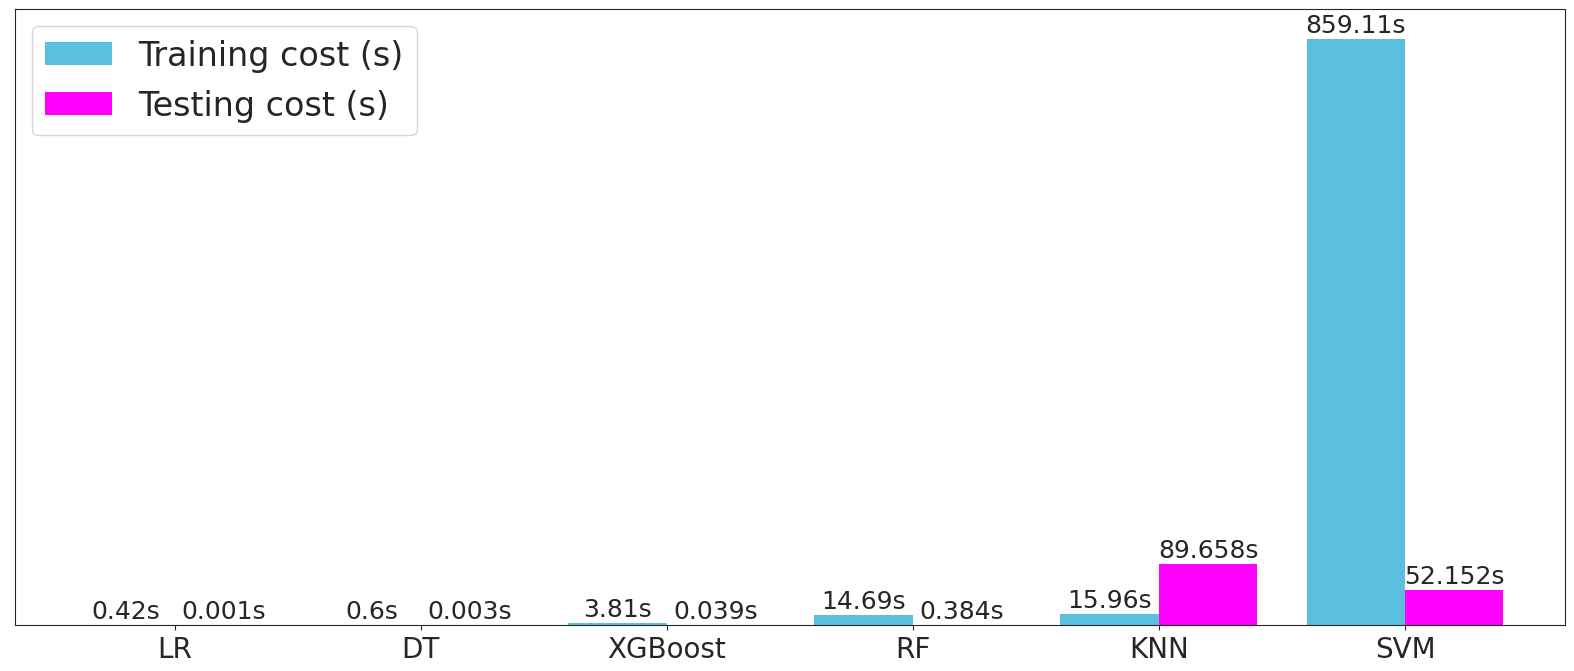

In [705]:
sns.set_style('ticks') # change background to white background
ax = cost.plot(kind='bar', alpha=1, figsize=(20, 8), fontsize=14, 
               color=['#5bc0de', 'magenta'],
               width=0.8, linewidth=0
               )
#ax.set_title('Cost', fontsize=16)
# ax.set_ylabel('Number of Immigrants')
# ax.set_xlabel('Years')
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.axes.yaxis.set_visible(False)
ax.legend(fontsize=24)
ax.set_xticklabels(cost.index, fontsize=20, rotation=0)

a = np.array([-0.2,0.2])

for i, index in enumerate(cost.index):
    for j, column in enumerate(cost.columns):
        value = cost.iloc[i,j]
        b = np.zeros(2)
        b[j]=1
        sft=np.dot(a,b)
        label = str(value) + 's'
        ax.annotate(label,xy=(i+sft, value + 10),fontsize=18,ha='center', rotation = 0) 
plt.savefig('cost.pdf',dpi=200, bbox_inches='tight')
my_mpl()

my matplotlib style has been reset.


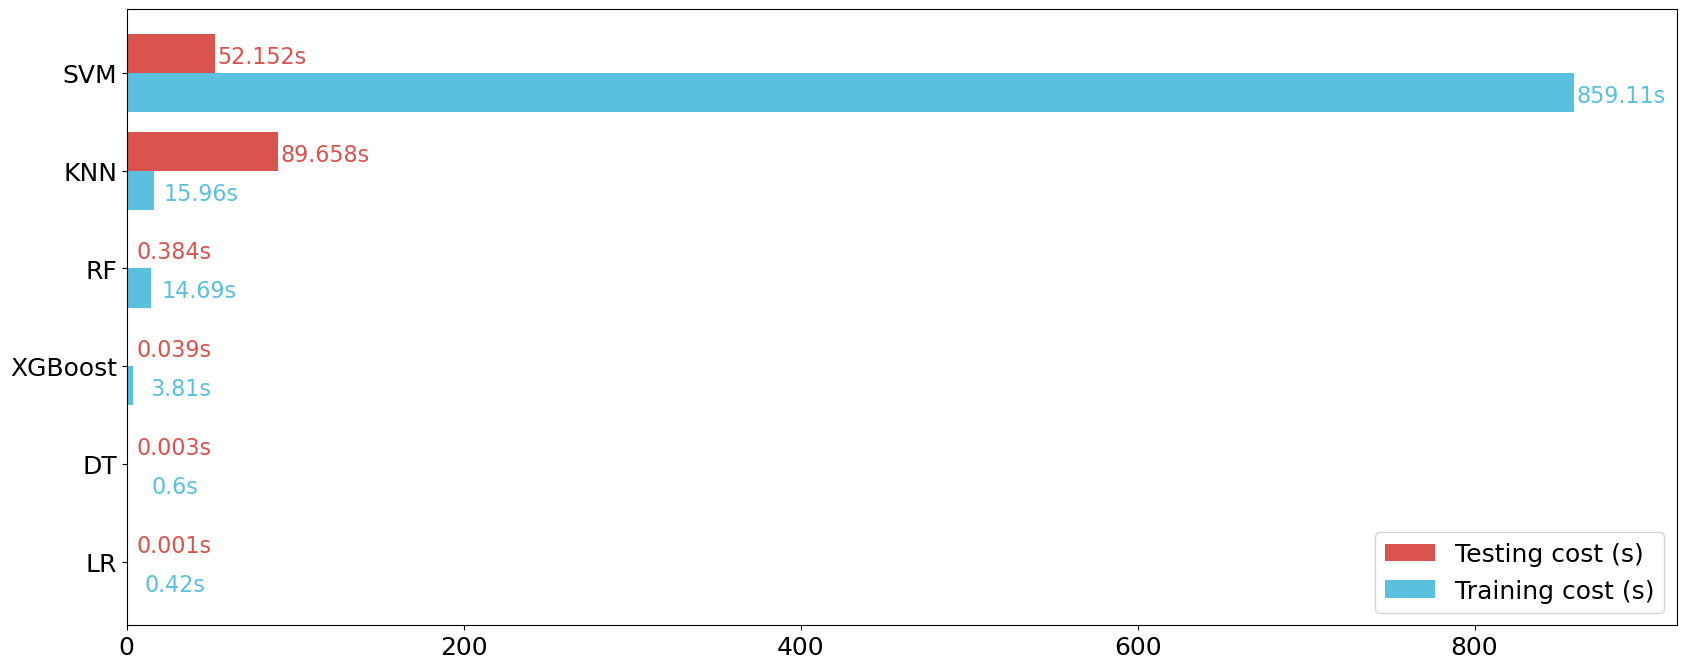

In [706]:
mycolor=['#5bc0de', '#d9534f']

ax2 = cost.plot.barh(alpha=1, figsize=(20, 8), fontsize=18, 
               color=mycolor, xlim=(0,920),
               width=0.8, linewidth=0)
a = np.array([-0.3,0.1])

#ax2.legend(loc='lower right')
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(reversed(handles), reversed(labels), loc='lower right')
for i, index in enumerate(cost.index):
    for j, column in enumerate(cost.columns):
        value = cost.iloc[i,j]
        b = np.zeros(2)
        b[j]=1
        sft=np.dot(a,b)
        label = str(value) + 's'
        ax2.annotate(label,xy=(value + 28 , i+ sft), fontsize=16,ha='center', rotation = 0, color = mycolor[j]) 
plt.savefig('costh.pdf',dpi=200, bbox_inches='tight')
my_mpl()

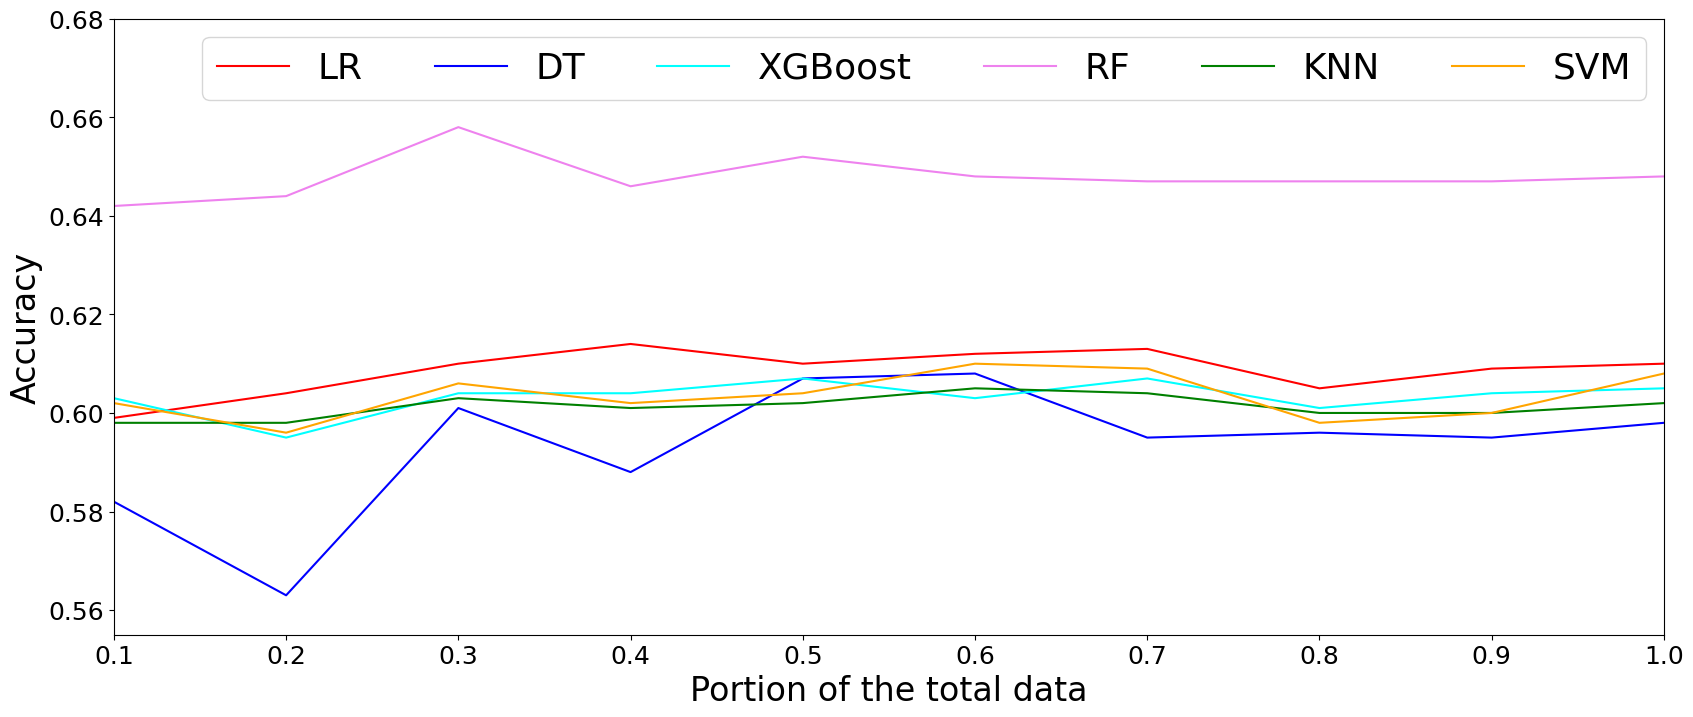

In [707]:
dfp = {'Portion of the total data':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 
      'LR':[0.599,0.604,0.610,0.614,0.610,0.612,0.613,0.605,0.609,0.610], 
      'DT':[0.582,0.563,0.601,0.588,0.607,0.608,0.595,0.596,0.595,0.598],
 'XGBoost':[0.603,0.595,0.604,0.604,0.607,0.603,0.607,0.601,0.604,0.605],
      'RF':[0.642,0.644,0.658,0.646,0.652,0.648,0.647,0.647,0.647,0.648],
     'KNN':[0.598,0.598,0.603,0.601,0.602,0.605,0.604,0.600,0.600,0.602],
     'SVM':[0.602,0.596,0.606,0.602,0.604,0.610,0.609,0.598,0.600,0.608]   
     }
dfp=pd.DataFrame(dfp)
ax = dfp.set_index('Portion of the total data').plot(
    figsize=(20, 8),
    color=['red','blue','cyan','violet','green','orange'],
    ylim=(0.555,0.68)
    )
ax.legend(loc='upper right', fontsize='x-large', ncol=len(dfp.columns))
ax.set_ylabel('Accuracy')  # we already handled the x-label with ax1
#ax.set_xlabel('K value in KNN')
plt.savefig('perfm.pdf',dpi=200,bbox_inches='tight')
plt.show()

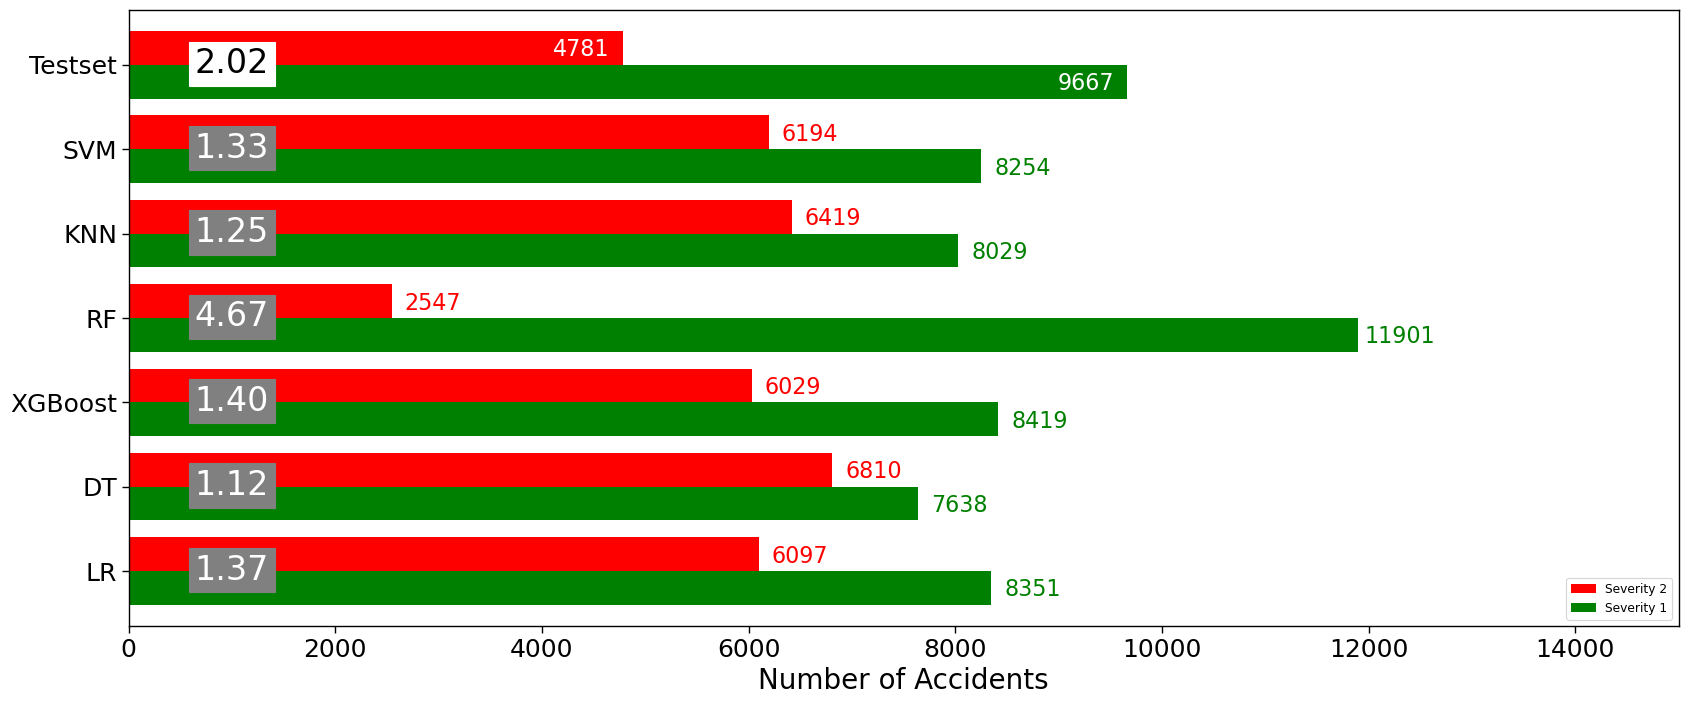

In [714]:
data = {''     : ['LR','DT','XGBoost','RF','KNN','SVM','Testset'],
        'Severity 1'  : [8351,7638,8419,11901,8029,8254, 9667  ],
        'Severity 2'  : [6097,6810,6029,2547,6419,6194, 4781  ]
       }
dfn = pd.DataFrame(data)
dfn.set_index('', inplace=True)

mycolor=['green', 'red']

ax2 = dfn.plot.barh(alpha=1, figsize=(20, 8), fontsize=18, 
               color=mycolor, xlim=(0,15000),
               width=0.8, linewidth=0)
a = np.array([-0.3,0.1])

handles, labels = ax2.get_legend_handles_labels()
ax2.legend( reversed(handles), reversed(labels), loc='lower right')

#ax.set_xlabel('Hour of day')
ax2.set_xlabel('Number of Accidents', fontsize=20)

for i, index in enumerate(dfn.index):   
    label = str(  "{:.2f}".format(dfn.iloc[i,0]/dfn.iloc[i,1])   )
    
    if i == 6:
        ax2.annotate(label,xy=(1000 , i-0.1), fontsize=24, ha='center',rotation = 0, 
                 color = 'black', backgroundcolor = "white") 
    else :
        ax2.annotate(label,xy=(1000 , i-0.1), fontsize=24, ha='center',rotation = 0, 
                 color = 'white', backgroundcolor = "grey") 
    
    for j, column in enumerate(dfn.columns):
        value = dfn.iloc[i,j]
        b = np.zeros(2)
        b[j]=1
        sft=np.dot(a,b)
        label = str(value) #+ 's'
        if i == 6 :
            ax2.annotate(label,xy=(value - 400 , i+ sft), fontsize=16,ha='center', rotation = 0, color = 'white'  ) 
        else :
            ax2.annotate(label,xy=(value + 400 , i+ sft), fontsize=16,ha='center', rotation = 0, color = mycolor[j]) 
                
        

plt.savefig('ratio.pdf',dpi=200, bbox_inches='tight')
plt.show()
#my_mpl()